# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

## 1. 📖 Introduction
Tasty Bytes was founded in 2020 in the midst of the Covid Pandemic. The world wanted inspiration so we decided to provide it. We started life as a search engine for recipes, helping people to find ways to use up the limited supplies they had at home. Now, over two years on, we are a fully fledged business. For a monthly subscription we will put together a full meal plan to ensure you and your family are getting a healthy, balanced diet whatever your budget. Subscribe to our premium plan and we will also deliver the ingredients to your door.

## 2. 🎯 Goals for this project


At the moment, the team choose their favorite recipe from a selection and display that on the home page. They have noticed that traffic to the rest of the website goes up by as much as 40% if they pick a popular recipe, but they don’t know how to decide if a recipe will be popular. More traffic means more subscriptions so this is really important to the company.

The product manager from Tasty Bytes specifically requested to:

🟢 Predict which recipes will lead to high traffic.

🟢 Correctly predict high traffic recipes 80% of the time.

## 3. 💾 The dataset


The product manager from TastyBytes provided data for each recipe, as well as whether there was high traffic when the recipe was featured on the home page. The features of the dataset are as follows

1. recipe:  Numeric, unique identifier of recipe
2. calories:    Numeric, number of calories
3. carbohydrate:    Numeric, amount of carbohydrates in grams
4. sugar:   Numeric, amount of sugar in grams
5. protein: Numeric, amount of protein in grams
6. category: Character, type of recipe. Recipes are listed in one of ten
possible groupings (Lunch/Snacks', 'Beverages', 'Potato',
'Vegetable', 'Meat', 'Chicken, 'Pork', 'Dessert', 'Breakfast', 'One
Dish Meal').
7. servings:  Numeric, number of servings for the recipe
8. high_traffic:    Character, if the traffic to the site was high when this recipe
was shown, this is marked with “High”.
 

In [45]:
# Importing necessary libraries

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import missingno as msno
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, make_scorer, confusion_matrix, f1_score, recall_score, precision_score, log_loss
from sklearn.feature_selection import RFE
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import warnings
from sklearn.base import BaseEstimator, TransformerMixin
warnings.filterwarnings("ignore")
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
import timeit
from sklearn.metrics import roc_curve, auc
from scipy.stats import ttest_ind, shapiro, levene, chi2_contingency, mannwhitneyu
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.utils.class_weight import compute_class_weight

## 4. 📕 Read the dataset

In [46]:
# Loading the dataset
df = pd.read_csv('recipe_site_traffic_2212.csv', delimiter = ',')

In [47]:
# Loading the first 5 samples of the dataset
df.head()

recipe  calories  carbohydrate  ...   category  servings high_traffic
0       1       NaN           NaN  ...       Pork         6         High
1       2     35.48         38.56  ...     Potato         4         High
2       3    914.28         42.68  ...  Breakfast         1          NaN
3       4     97.03         30.56  ...  Beverages         4         High
4       5     27.05          1.85  ...  Beverages         4          NaN

[5 rows x 8 columns]

In [48]:
df.shape

(947, 8)

The dataset contains information that is categorized into 8 columns for a total of 947 recipes.

## 5. 🧹 Data validation and cleaning 

In this step, we aim to to do the following:

1. Identify and address any missing values in the dataset by either removing or imputing them appropriately.  
2. Verify the data types of all variables and adjust them as needed to ensure consistency with the dataset description.  
3. Identify and resolve inconsistencies in numerical columns, such as the presence of negative values where they are not logically applicable.  
4. Identify and handle duplicate records to maintain data integrity and reliability.  
5. Identify and resolve inconsistencies in categorical columns.

### 5.1 Handling Missing Values  

In this section, we will identify and assess the presence of missing values in the dataset. Appropriate strategies will be applied to address any missing data to ensure the integrity and reliability of the analysis. A summary of key insights and the methods used for handling missing values will be provided at the end of this section.

In [49]:
# Checking for missing values in the dataset.
df.isnull().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

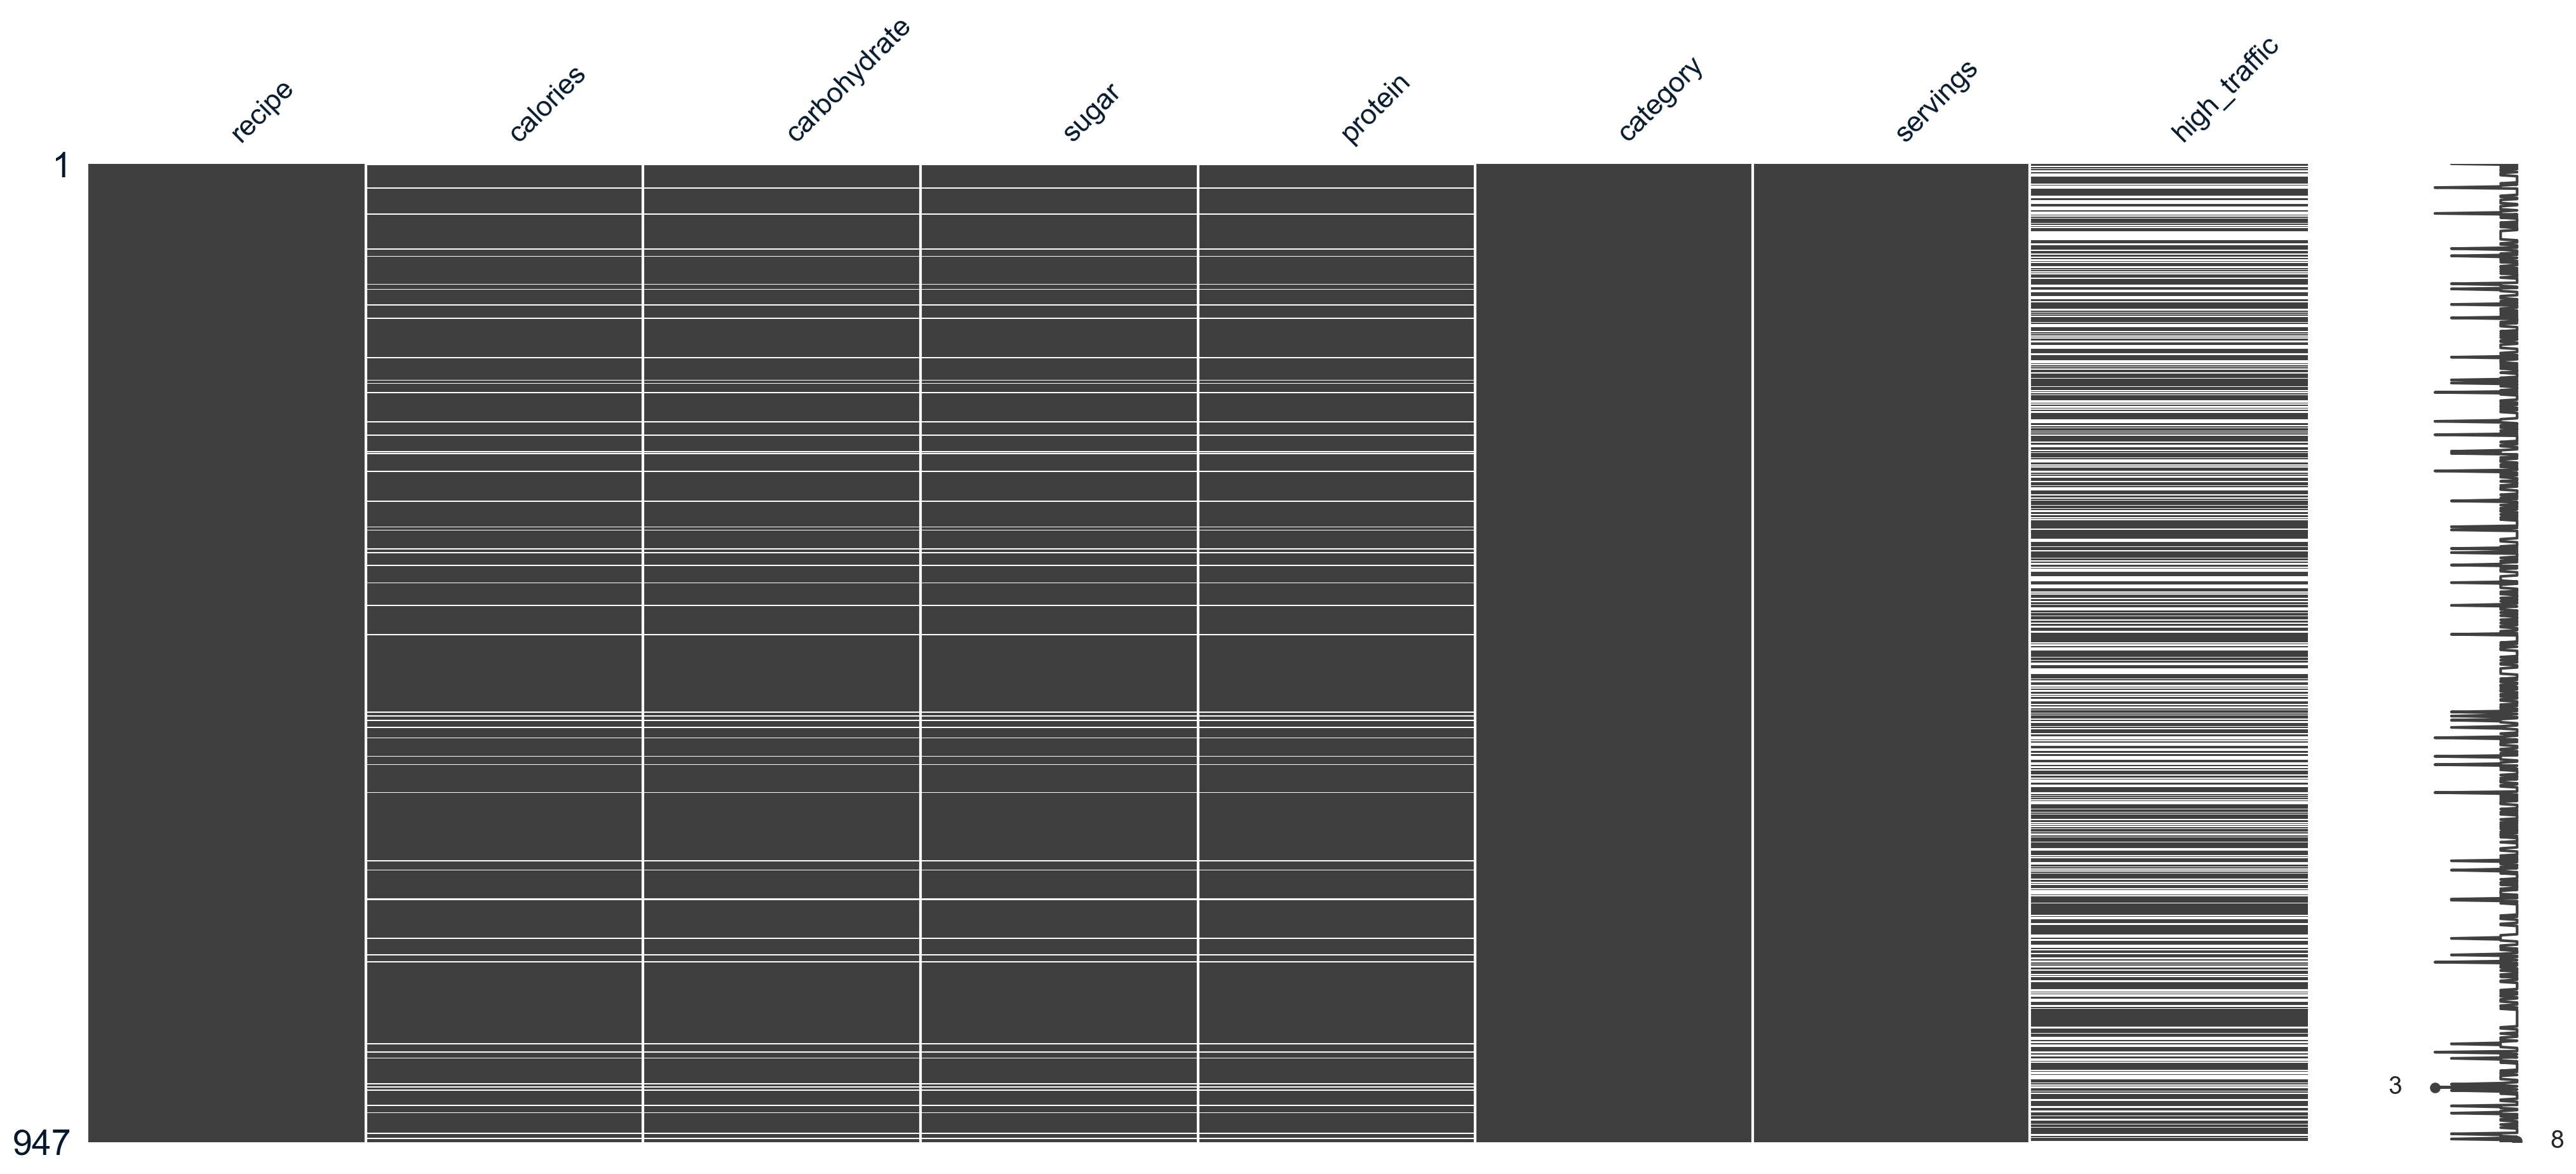

In [50]:
# using missingno for visualizing the missing values
msno.matrix(df)
plt.show()

From the chart above, we can observe a certain pattern in the distribution of our dataset, it is observed that the distribution of the missing values in the dataset is not at random, with missing values in the 'calories', 'carbohydrate', 'sugar' and 'protein' occuring concurrently. There however seems to be a lot of missing values in the 'high_traffic' column. This will be investigated.


In [51]:
# Checking the unique values in the 'high_traffic' column
df['high_traffic'].unique()

array(['High', nan], dtype=object)

According to the dataset description, the 'High' label is assigned to recipes that reeceived high traffic when shown on the site. We can therefore safely assume that the null values represent the recipes that didnot have high traffic. We would therefore replace the null values with 'Low'.

In [52]:
# for the column high_traffic, replace the missing values with 'Low'
df['high_traffic'].fillna(value='Low', inplace=True)

In [53]:
# Dropping the missing values in the dataset
df.dropna(inplace = True)

In [54]:
# Analysing the number of missing values in the dataset after dropping them
df.isna().sum()

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

#### Summary
We found 52 recipes with missing data in the 'calories', 'carbohydrate', 'sugar', and 'protein' columns. Visual inspection confirmed that these missing values occurred concurrently across all four columns for each of these recipes. Since these recipes represented a small fraction of our total 947, we removed them.

Additionally, the 'high_traffic' column had 373 missing values. Based on the dataset's description, we inferred that these missing values corresponded to recipes with low traffic. Therefore, we replaced all missing 'high_traffic' entries with 'Low'.

Following these cleaning steps, our final dataset contains 895 recipes with complete and validated data.

### 5.2 Data Type Validation

In this section, we will examine the data types of the features in the dataset to ensure they align with the specifications provided in the dataset description. Where necessary, data types will be adjusted to maintain consistency and accuracy. A summary of key insights and the methods used for handling data type discrepancies will be provided at the end of this section.

In [55]:
# Getting information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        895 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      895 non-null    object 
 6   servings      895 non-null    object 
 7   high_traffic  895 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 62.9+ KB


In [56]:
# Getting the distribution of the number of servings for each recipe
df["servings"].value_counts()

4               365
6               184
2               174
1               169
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64

In [57]:
# Converting the string values in the "servings" column to their numeric equivalent.
df["servings"] = df["servings"].str.split(" ", expand = True)[0]

In [58]:
# Getting the distribution of the newly cleaned "servings" column
df["servings"].value_counts()

4    367
6    185
2    174
1    169
Name: servings, dtype: int64

In [59]:
# convert the "servings" column to integer type
df['servings'] = df['servings'].astype(int)
df['servings'].dtype

dtype('int64')

#### Summary
When reviewing the data types, it was observed that the servings column needed to be converted from object to integer type.

On the other hand, the servings column contained two values, '4 as a snack' and '6 as a snack', which could not be converted to integers. Therefore, we replaced '4 as a snack' with 4 and '6 as a snack' with 6.

## 5.3 Identify and Resolving Inconsistencies in Numerical columns.
In this section, we will examine numerical columns for potential inconsistencies, such as negative values where they are not logically applicable. Necessary corrections will be made to ensure data integrity and accuracy.

In [60]:
df.drop(columns = ["servings", "recipe"]).describe()

calories  carbohydrate       sugar     protein
count   895.000000    895.000000  895.000000  895.000000
mean    435.939196     35.069676    9.046547   24.149296
std     453.020997     43.949032   14.679176   36.369739
min       0.140000      0.030000    0.010000    0.000000
25%     110.430000      8.375000    1.690000    3.195000
50%     288.550000     21.480000    4.550000   10.800000
75%     597.650000     44.965000    9.800000   30.200000
max    3633.160000    530.420000  148.750000  363.360000

#### Summary
  

The following summary provides a data validation check on the numerical columns to assess their range and distribution:

- Calories: The range of calorie values spans from a minimum of 2 to a maximum of 947, with the 25th, 50th, and 75th percentiles at 237.5, 475, and 708.5, respectively. This suggests a wide range of recipe calorie counts, with a few outliers on the higher end. The mean of 473.65 indicates a central tendency around mid-range calorie values.
  
- Carbohydrate: Carbohydrates have a minimum value of 0.14 and a maximum value of 3633.16, with a median of 288.55 and a mean of 435.94. The presence of a large spread between the 25th and 75th percentiles (110.43 to 597.65) indicates significant variability in carbohydrate content, with some outliers in the higher range.

- Sugar: The sugar content ranges from 0.03 to 530.42, with the median at 21.48 and the mean at 35.07. The wide variation, especially with a max value much higher than the 75th percentile (9.8), suggests some recipes contain unusually high amounts of sugar, potentially indicating outliers or data entry errors.

- Protein: Protein values range from 0.0 to 363.36, with a mean of 24.15 and a median of 10.8. The data shows a relatively lower concentration of protein compared to other nutrients, with the 75th percentile at 30.2 and a maximum value much higher, suggesting that some recipes may have excessively high protein content compared to others.


In summary, there is no inconsistencies and negative values in the numerical columns of the dataset.



### 5.4 Identifying and Handling Duplicate Values  

In this section, we will assess the dataset for duplicate records, which could impact the accuracy and reliability of the analysis. If duplicates are found, appropriate measures will be taken to handle them effectively. 

In [61]:
# Checking for duplicated values in the dataset
print(f"There is {df.duplicated().sum()} duplicated values in the dataset.")

There is 0 duplicated values in the dataset.


### 5.5 Identifying and Resolving Inconsistencies in Categorical Columns  

In this section, we will examine categorical columns for inconsistencies, such as misspellings, variations in formatting, or unexpected values. Necessary corrections will be applied to ensure uniformity and accuracy in the dataset. A summary of key insights and the approach taken to address these inconsistencies will be provided at the end of this section.

In [62]:
# Getting the distribution of the "category" column of the dataset.
df['category'].value_counts() 

Breakfast         106
Chicken Breast     94
Beverages          92
Potato             83
Lunch/Snacks       82
Vegetable          78
Dessert            77
Meat               74
Pork               73
Chicken            69
One Dish Meal      67
Name: category, dtype: int64

In [63]:
# Converting all occurences of "chicken breast" in the "category" column to "chicken"
df['category'] = np.where(df['category'].str.contains("Chicken Breast"), "Chicken", df["category"])
df['category'].value_counts() 

Chicken          163
Breakfast        106
Beverages         92
Potato            83
Lunch/Snacks      82
Vegetable         78
Dessert           77
Meat              74
Pork              73
One Dish Meal     67
Name: category, dtype: int64

#### Summary

The dataset description specifies 10 recipe categories; however, our analysis revealed 11 distinct categories. To maintain consistency with the dataset description, we merged the "Chicken" category with "Chicken Breast" to align with the dataset description accordingly.

## 6. 📈 Exploratory Data Analysis

### 6.1 Analyzing the Distribution of the "high_traffic" Class  

In this section, we will examine the distribution of the "high_traffic" class using visualizations such as bar plots and pie charts. This analysis will also provide insights into the balance of the target variable and help inform subsequent modeling decisions.

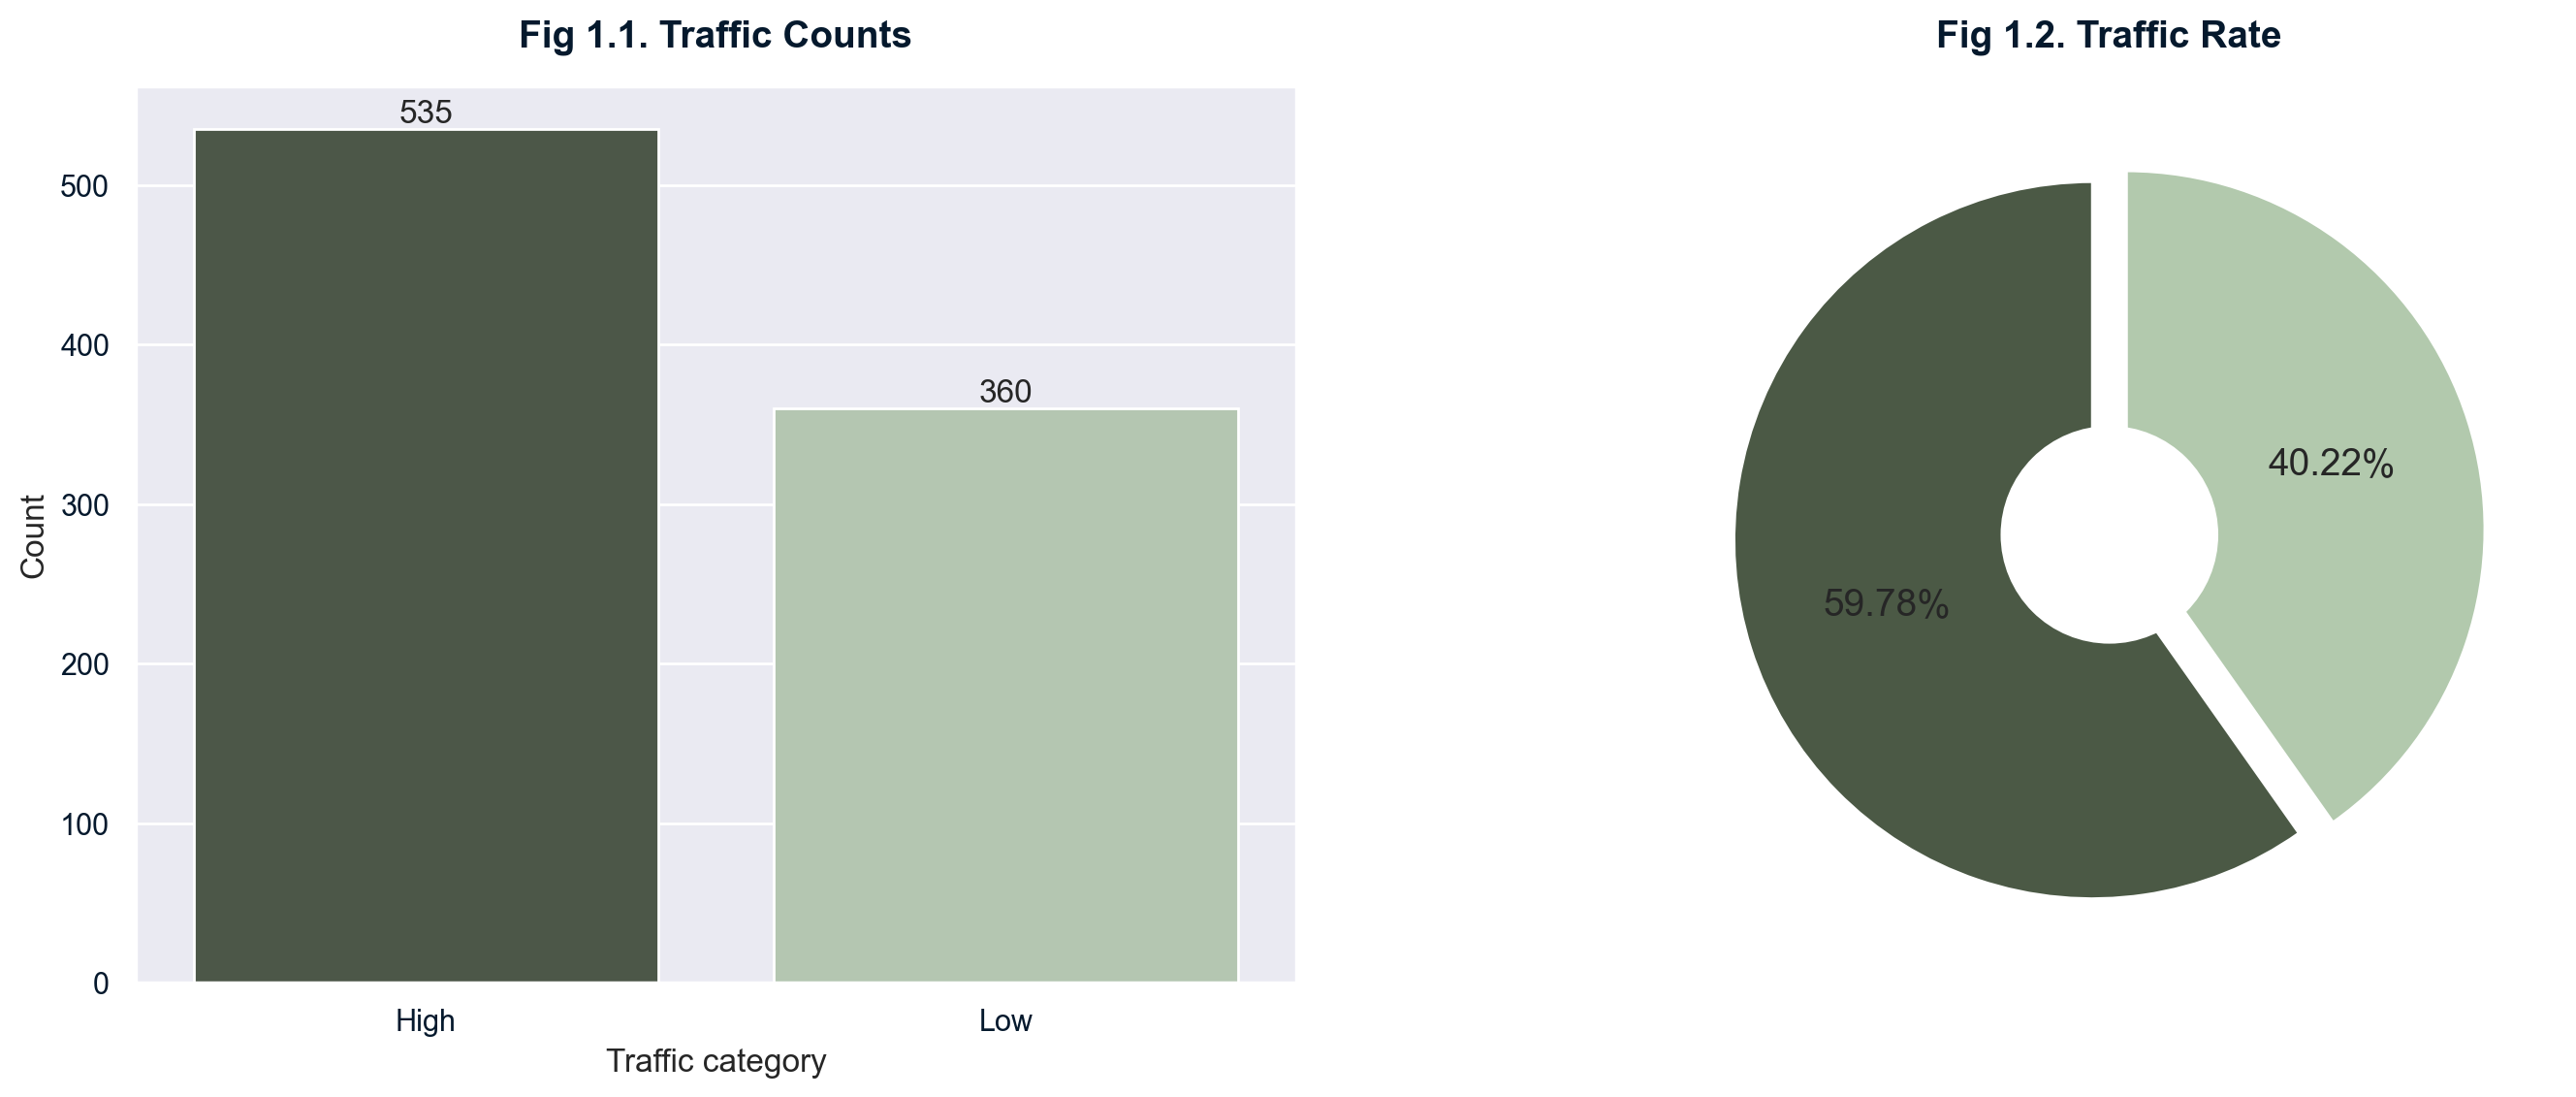

In [64]:
# Set Seaborn aesthetic parameters for all the following plots
sns.set()

# Create a new figure for the plots with a specified size (17x6 inches)
plt.figure(figsize=(17, 6))

# First subplot: Bar plot of churn (or dropout) counts
plt.subplot(1, 2, 1)  # Set up a 1x2 grid of subplots, this is the first plot
# Count the occurrences of each unique value in the 'Target' column
high_traffic_rate = df['high_traffic'].value_counts()

# Create a color palette based on the number of unique dropout categories
colors = ["#4B5945", "#B2C9AD"]

# Create a bar plot with 'Target' categories on the x-axis and their counts on the y-axis
ax = sns.barplot(x=high_traffic_rate.index, y=high_traffic_rate.values, palette=colors)

# Labelling the axis
ax.set_xlabel("Traffic category")
ax.set_ylabel("Count")

# Add a title to the bar plot with custom font weight, size, and padding
plt.title("Fig 1.1. Traffic Counts", fontweight="black", size=14, pad=15)

# Loop through each container in the bar plot to add labels showing the height (value) of each bar
for container in ax.containers:
    ax.bar_label(container)

# Second subplot: Exploded pie chart showing dropout percentage
plt.subplot(1, 2, 2)  # Move to the second plot in the 1x2 grid

# Specify the explosion (separation) for each slice in the pie chart (0.05 for slight separation)
explode = [0.05] * len(high_traffic_rate)

# Create a pie chart of the dropout rate with percentage labels, larger text, and starting angle at 90 degrees
plt.pie(high_traffic_rate, autopct="%.2f%%", textprops={"size": 14}, startangle=90, explode=explode, colors=colors)

# Create a white circle in the middle to give the pie chart a donut-like appearance
center_circle = plt.Circle((0, 0), 0.3, fc='white')

# Get the current figure and add the white circle to the pie chart
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Add a title to the pie chart with custom font weight, size, and padding
plt.title("Fig 1.2. Traffic Rate", fontweight="black", size=14, pad=15)

# Display the final set of plots
plt.show()


#### Summary


The "High" traffic category has a count of 535 which represents 59.78% of the total traffic. The "Low" traffic category has a count of 360 which represents 40.22% of the total traffic. There is a noticeable difference between the two categories, with "High" traffic occurring significantly more frequently than "Low" traffic. This shows that the target class in the dataset is imbalanced. Further analysis and handling of this class imbalance will be handled in the Modelling section.

### 6.2. Outlier Analysis
  

In this section, outliers in the numerical features are identified using the **Z-score method**, with a threshold set at 3 standard deviations (S.D.). The number of outliers detected in each feature is reported, providing insights into potential anomalies in the dataset.

In [65]:
# Creating a function to get the outliers in the dataset using the z-score method.
def z_score_outlier_detection(data, threshold=3):
    # Calculate the mean of the data
    mean = np.mean(data)

    # Calculate the standard deviation of the data
    std_dev = np.std(data)

    # Compute the Z-scores for each data point
    z_scores = (data - mean) / std_dev

    # Identify the outliers where the absolute Z-score is greater than the threshold
    outliers = data[np.abs(z_scores) > threshold]

    return outliers

In [66]:
df_new = df.copy()
num_cols = ["calories", "sugar", "protein", "carbohydrate"]
# Iterate over each column in the list of numerical features
for cols in num_cols:
    # Apply the Z-score outlier detection function to the current column
    outliers = z_score_outlier_detection(df[cols], threshold=3)
    new_col = cols + '_outlier'
    df_new[new_col] = np.where(df_new[cols].isin(outliers) , True, False)
    # Print the name of the current column
    print(f"Number of Outliers for {cols} : ")
    
    # Convert the outliers to a NumPy array and count them
    print(len(outliers.values), '\n')


Number of Outliers for calories : 
14 

Number of Outliers for sugar : 
21 

Number of Outliers for protein : 
19 

Number of Outliers for carbohydrate : 
17 



### 6.3. Analyzing the distribution of Nutritional features in the dataset.


In this section, we will explore the distribution of nutritional features such as calories, sugar, protein, and carbohydrate using visualizations such as histograms and box plots. This analysis will provide insights into the spread and potential skewness of the data, as well as identify any outliers.

<Figure size 2000x2000 with 0 Axes>

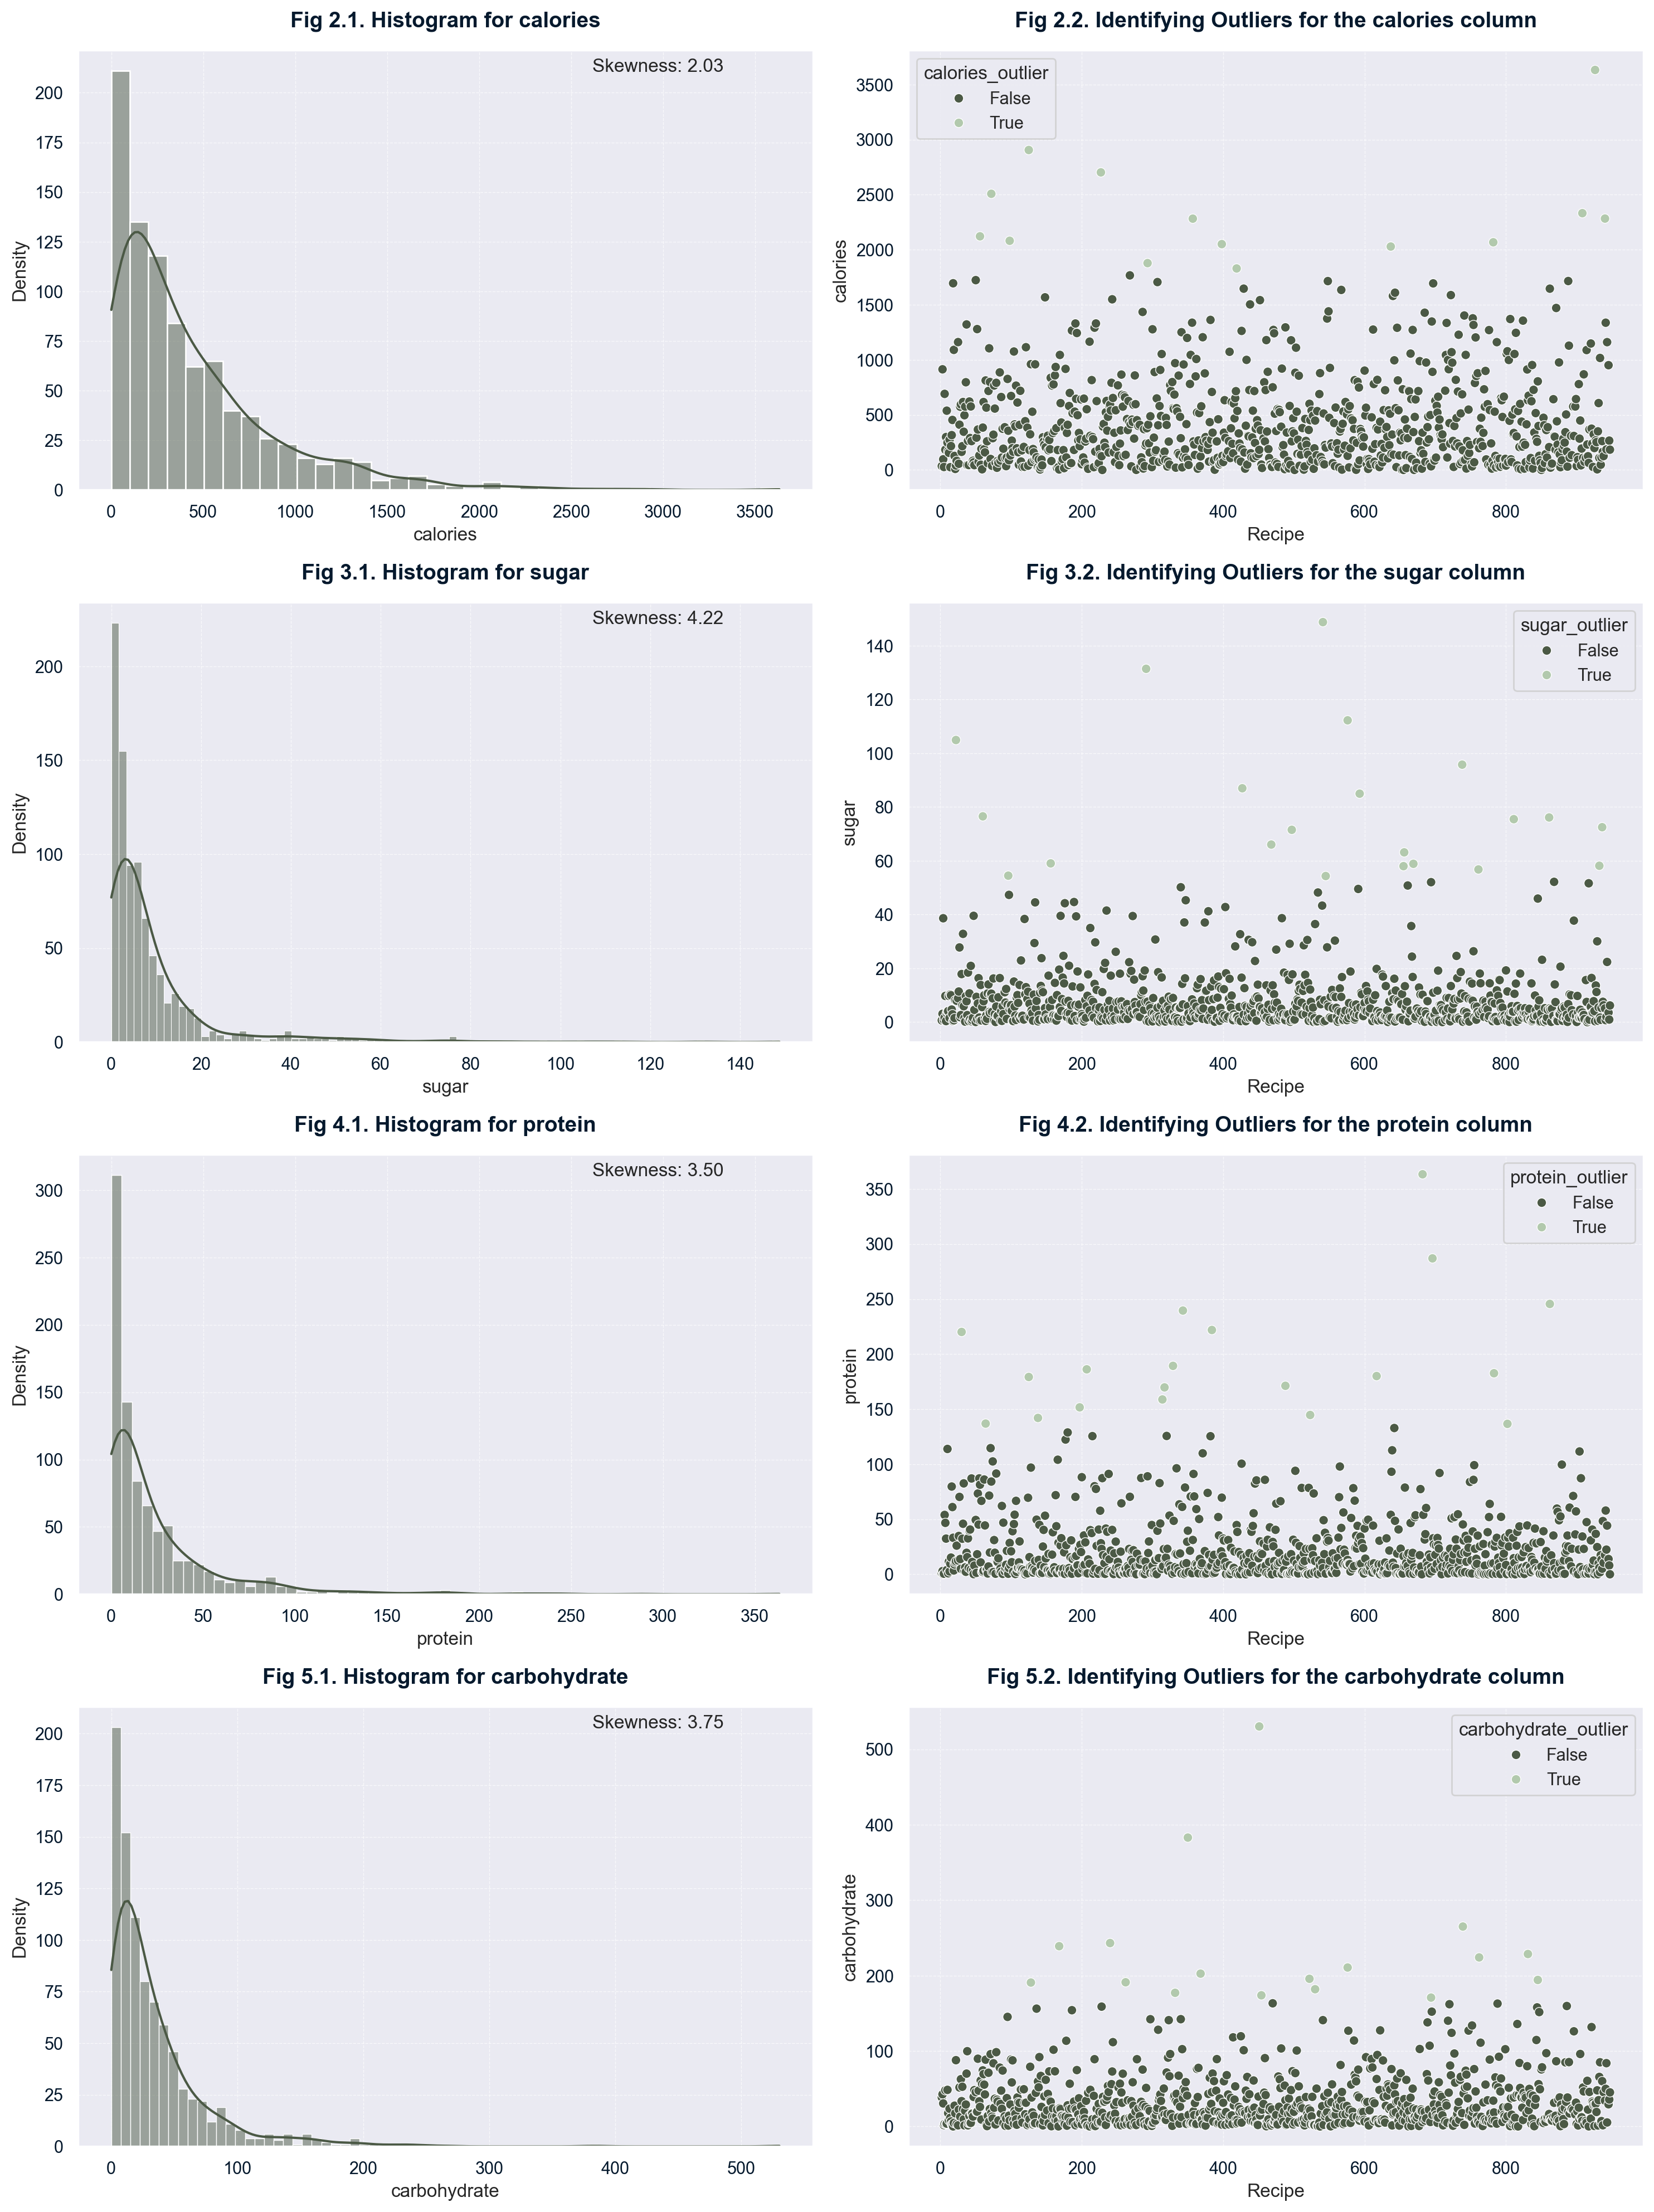

In [67]:
# Set up the figure size
plt.figure(figsize=(20, 20))

# Select all numerical features except 'recipe'
numerical_features = [col for col in df_new[num_cols].columns if col != 'recipe']

# Define grid size for subplots (each numerical feature gets two plots side by side)
rows, cols = len(numerical_features), 2
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 5 * rows))

# Ensure axes is always treated as a 2D array
if len(numerical_features) == 1:
    axes = axes.reshape(1, -1)

# Loop through each numerical feature to create histograms and scatter plots
for i, feature in enumerate(numerical_features):
    # Histogram with KDE
    sns.histplot(data=df_new, x=feature, kde=True, ax=axes[i][0], color = colors[0])
    axes[i][0].set_title(f'Fig {i+2}.1. Histogram for {feature}', fontweight="black", size=14, pad=15)
    axes[i][0].set_xlabel(feature)
    axes[i][0].set_ylabel('Density')
    axes[i][0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    
    # Calculate and display skewness
    skewness = stats.skew(df_new[feature])
    axes[i][0].text(0.7, 0.95, f'Skewness: {skewness:.2f}', transform=axes[i][0].transAxes, fontsize=12)
    
    # Scatter plot
    sns.scatterplot(data=df_new, x='recipe', y=feature, hue=feature + '_outlier', ax=axes[i][1], palette= colors)
    axes[i][1].set_title(f'Fig {i+2}.2. Identifying Outliers for the {feature} column', fontweight="black", size=14, pad=15)
    axes[i][1].set_xlabel('Recipe')
    axes[i][1].set_ylabel(feature)
    axes[i][1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


#### Summary
The nutritional data for recipes shows a typical pattern: most recipes are low in nutrients like calories, but a few have significantly higher values, causing them to have a right tail distribution.  We used scatterplots to see if these outliers had any common characteristics, but didn't find any clear patterns.  This means we need to investigate further to understand if these high-value recipes are genuine or the result of errors.

### 6.4 Analyzing the Distribution of the Category Feature  

In this section, we will examine the distribution of the category feature to understand the frequency of each category. Visualizations such as bar plots  will be used to provide insights into the balance and representation of different categories within the dataset. 

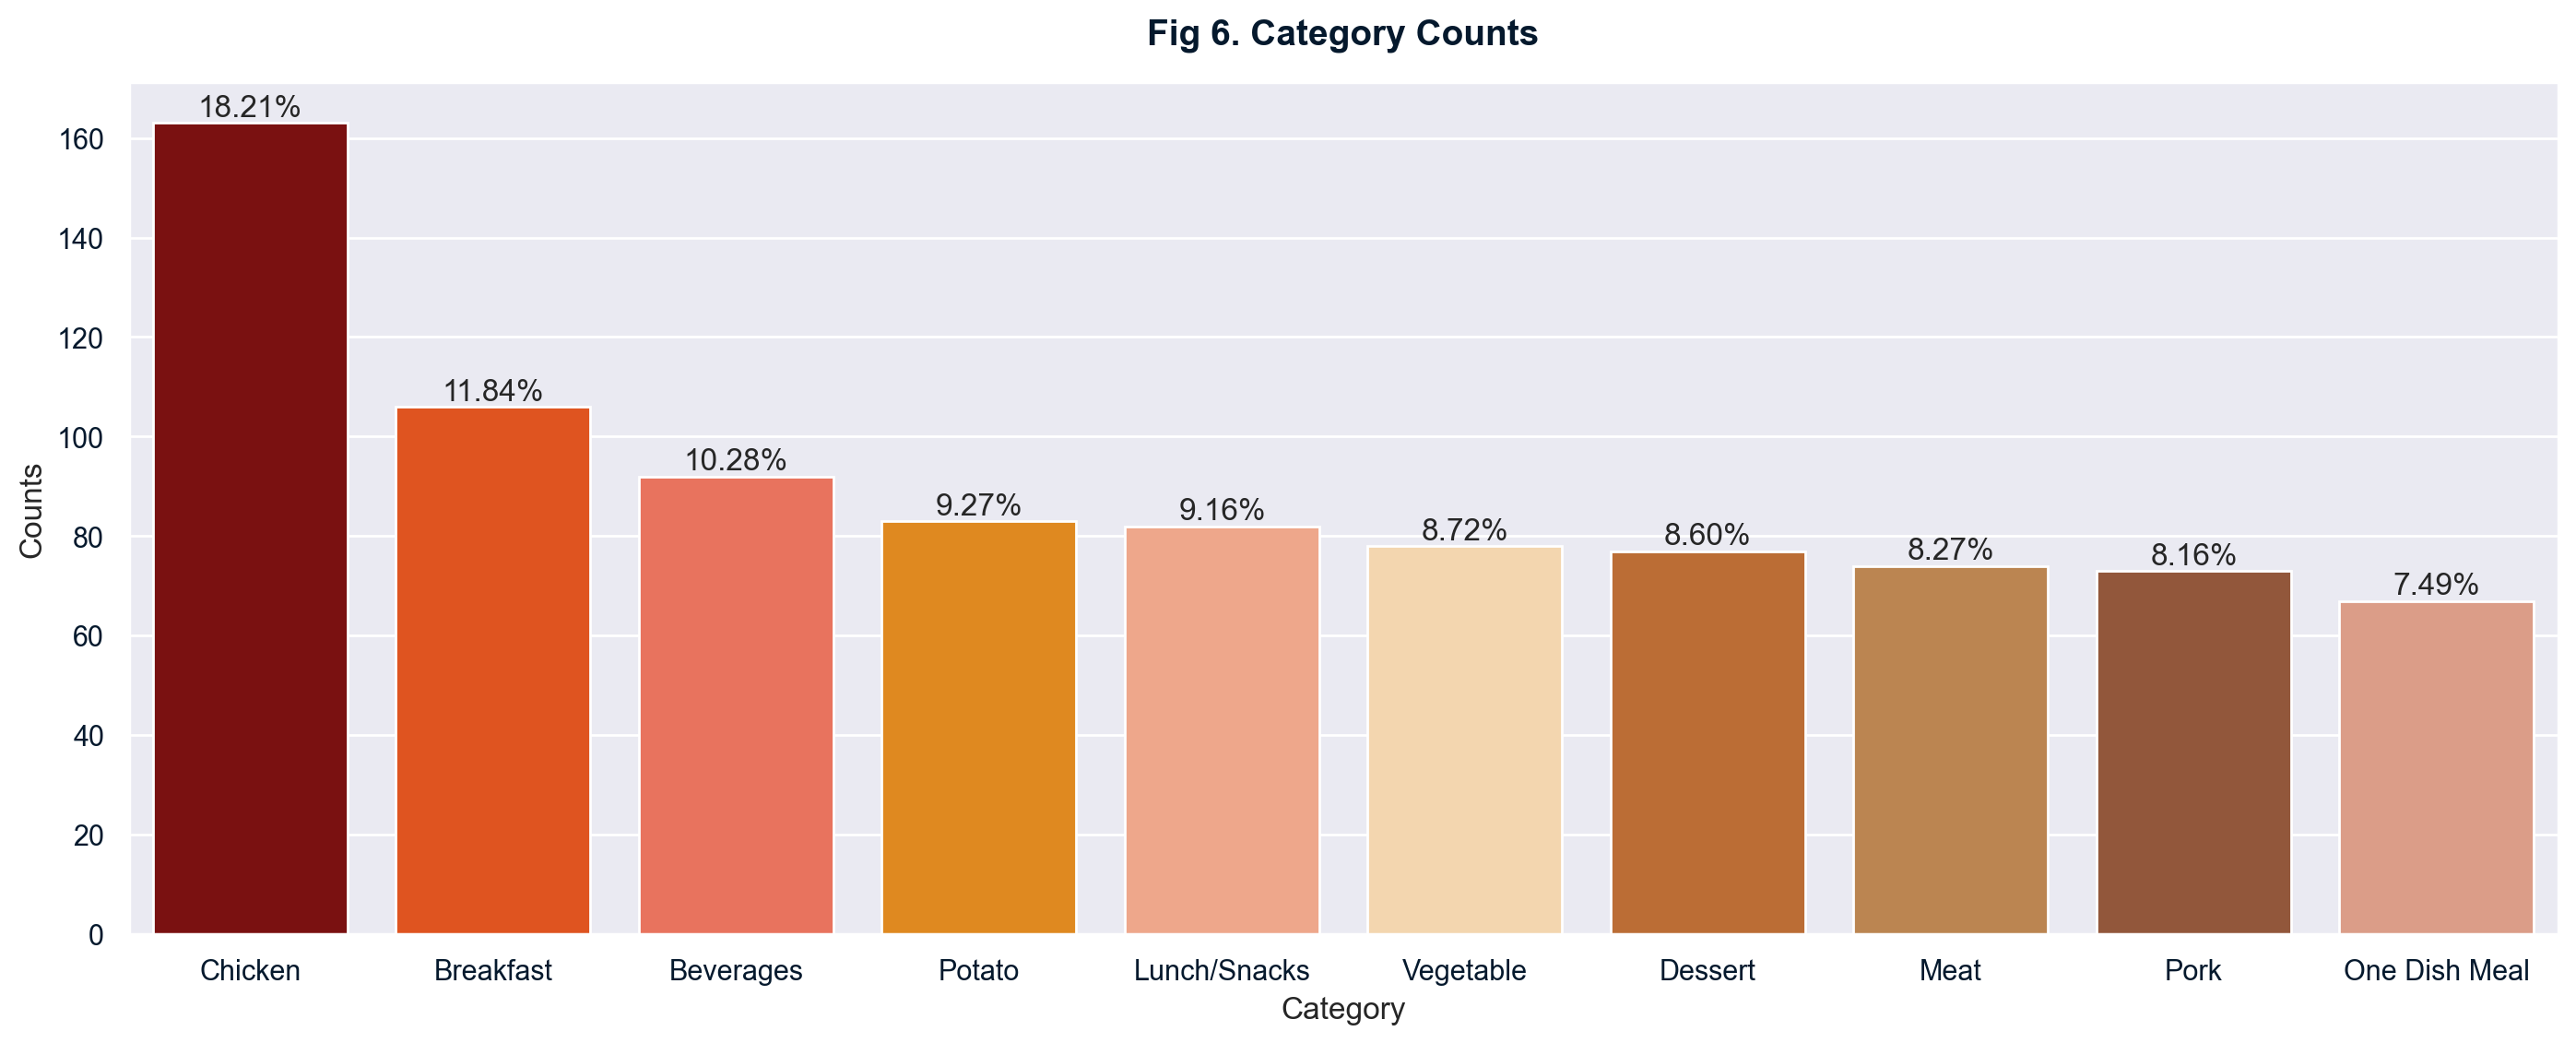

In [68]:
# Set Seaborn aesthetic parameters for all the following plots
sns.set()

# Create a new figure for the plots with a specified size (17x6 inches)
plt.figure(figsize=(17, 6))

# Count the occurrences of each unique value in the 'Target' column
category_rate = df['category'].value_counts()

total = category_rate.sum()

# Create a color palette based on the number of unique dropout categories
colors2 = [
    "#8B0000", 
    "#FF4500",  
    "#FF6347",  
    "#FF8C00",  
    "#FFA07A",  
    "#FFD7A3",  
    "#D2691E",  
    "#CD853F",  
    "#A0522D",  
    "#E9967A"   
]

# Create a bar plot with 'Target' categories on the x-axis and their counts on the y-axis
ax = sns.barplot(x=category_rate.index, y=category_rate.values, palette=colors2)

# Renaming the axis
plt.xlabel("Category")
plt.ylabel("Counts")

# Add a title to the bar plot with custom font weight, size, and padding
plt.title("Fig 6. Category Counts", fontweight="black", size=14, pad=15)

# Loop through each container in the bar plot to add labels showing the height (value) of each bar
for container in ax.containers:
    ax.bar_label(container, labels=[f'{(val/total)*100:.2f}%' for val in container.datavalues])

The 'Chicken' category has the highest count, representing 18.21% of the data, followed by 'Breakfast' at 11.84%, with other categories showing decreasing counts, each representing less than 10% of the data.

### 6.5 Analyzing the Distribution of the Category Feature for High- and Low-Traffic Recipes  

In this section, we will examine how different recipe categories are distributed across high-traffic and low-traffic recipes. This analysis will provide insights into which categories are more popular and how they contribute to overall traffic patterns. 

In [69]:
# Create a cross-tabulation (contingency table) of `category` vs `high_traffic`
# This counts the number of occurrences of each `category`, split by `high_traffic` 
cats_counts_pivot = pd.crosstab(df['category'], df['high_traffic'])

# Display the resulting pivot table
cats_counts_pivot


high_traffic   High  Low
category                
Beverages         5   87
Breakfast        33   73
Chicken          69   94
Dessert          48   29
Lunch/Snacks     52   30
Meat             56   18
One Dish Meal    51   16
Pork             66    7
Potato           78    5
Vegetable        77    1

<Figure size 1200x600 with 0 Axes>

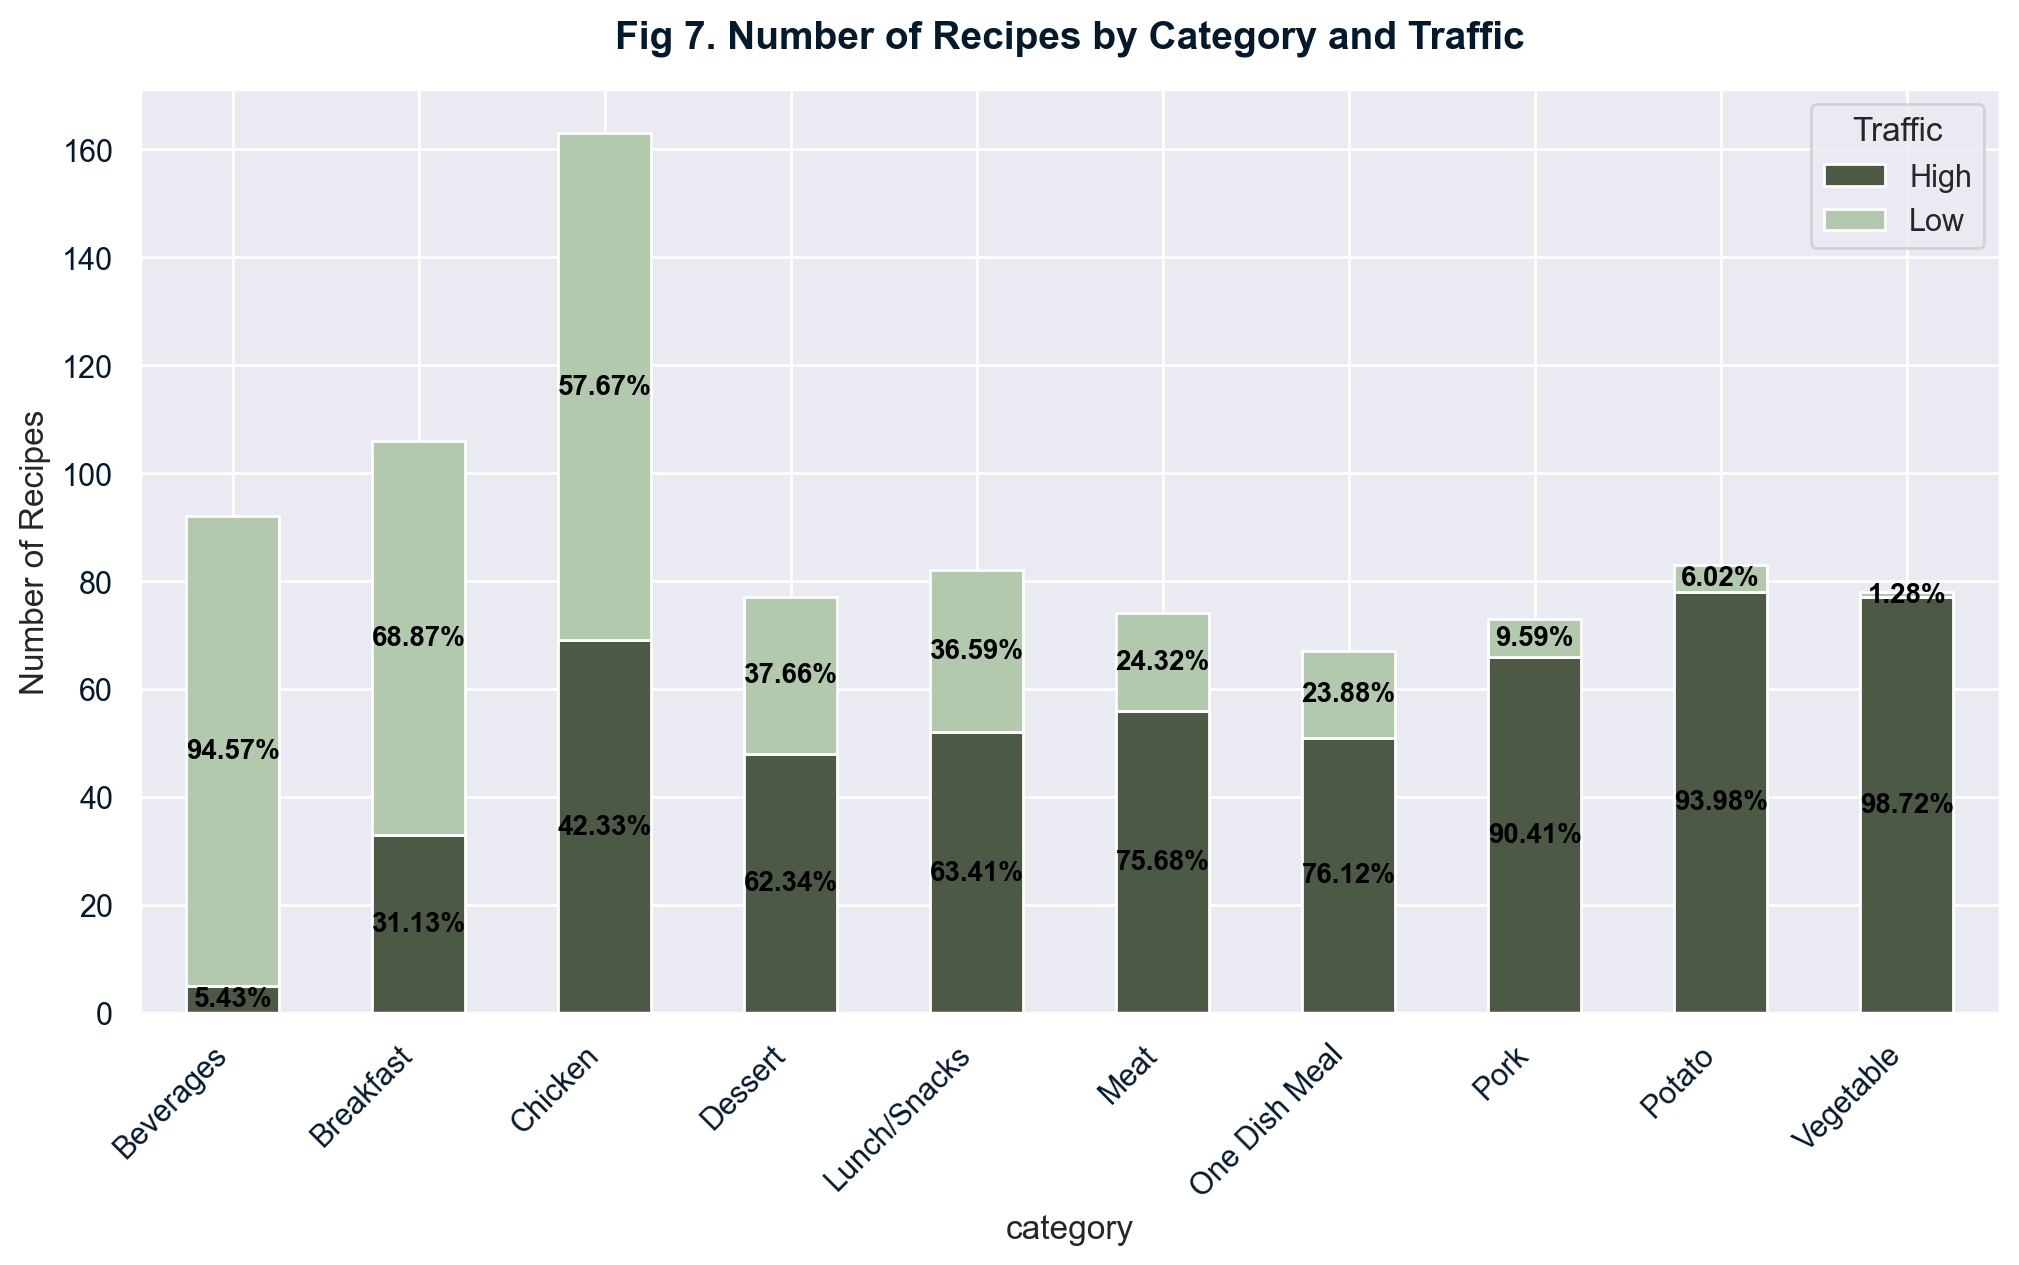

In [70]:
# Set figure size
plt.figure(figsize=(12, 6))

# Plot the stacked bar chart
ax = cats_counts_pivot.plot(
    kind="bar", 
    color=colors, 
    ylabel="Number of Recipes", 
    stacked=True, 
    figsize=(12, 6)
)

# Title styling
plt.title("Fig 7. Number of Recipes by Category and Traffic", fontweight="bold", size=14, pad=15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Calculate the total count for each category
totals = cats_counts_pivot.sum(axis=1)

# Annotate bars with high-to-low traffic ratio
for i, (idx, row) in enumerate(cats_counts_pivot.iterrows()):
    high = row["High"]
    low = row["Low"]
    total = totals[idx]
    
    # Compute percentage
    high_pct = (high / total) * 100
    low_pct = (low / total) * 100

    # Get bar positions
    high_bar = ax.patches[i]  # High traffic bars
    low_bar = ax.patches[i + len(cats_counts_pivot)]  # Low traffic bars

    # Position for annotation
    x = high_bar.get_x() + high_bar.get_width() / 2
    y_high = high_bar.get_y() + high_bar.get_height()
    y_low = low_bar.get_y() + low_bar.get_height()

    # Annotate with percentage values
    ax.text(x, y_high - high_bar.get_height() / 2, f"{high_pct:.2f}%", 
            ha="center", va="center", fontsize=10, color="black", fontweight="bold")

    ax.text(x, y_low - low_bar.get_height() / 2, f"{low_pct:.2f}%", 
            ha="center", va="center", fontsize=10, color="black", fontweight="bold")

# Move the legend to the upper right
plt.legend(title="Traffic", loc="upper right")

# Show the plot
plt.show()


#### Summary

The 'Chicken' category has the highest total number of recipes, with a notable skew towards the 'Low' traffic segment, representing 57.67% of its recipes.  Conversely, 'Beverages' and 'Vegetable' categories are dominated by 'High' traffic recipes, accounting for 94.57% and 98.72% respectively, indicating a strong preference for these categories among high-traffic users.  Categories like 'Breakfast' and 'Lunch/Snacks' show a more balanced distribution between 'High' and 'Low' traffic, though 'Lunch/Snacks' leans slightly towards 'Low'.  'Dessert', 'Meat', 'One Dish Meal', and 'Pork' categories have a majority of recipes in the 'Low' traffic segment, but with varying degrees. Notably, 'Potato' shows a high concentration of 'High' traffic recipes, similar to 'Beverages' and 'Vegetable', albeit with a lower overall recipe count.

### 6.6 Analyzing the Distribution of Nutritional Features in Relation to High-Traffic Recipes  

In this section, we will examine how nutritional features such as calories, carbohydrates, sugar, and protein vary between high-traffic and low-traffic recipes. Using visualizations like box plots, we aim to identify patterns or trends that may indicate a relationship between nutritional content and recipe popularity. This analysis will provide insights into whether certain nutritional characteristics contribute to higher traffic. To interpret the boxplots for each nutritional characteristic, we compared the medians and quartiles of the high-traffic and low-traffic groups visually. 

In [71]:
# Creating a function to plot the boxplot visualization 
def boxplot_with_hue(df, col, response_col, fig_num):
        # Print the mean of `col` for each category in `response_col`
    print(df.groupby(response_col)[col].mean().reset_index())

    # Create a boxplot with different categories on the x-axis and numerical values on the y-axis
    sns.boxplot(x=response_col, y=col, data=df, palette= colors, showmeans=True)

    # Set the title of the plot with figure number
    plt.title(f"Fig {fig_num}. Distribution of {col} by {response_col}", 
              fontweight="bold", size=14, pad=10)

    # Adjust layout to prevent overlapping elements
    plt.tight_layout()

    # Display the plot
    plt.show()

#### 6.6.1 Visualizing the distribution of calories content across high-traffic and low-level traffic recipes

  high_traffic    calories
0         High  463.565196
1          Low  394.883889


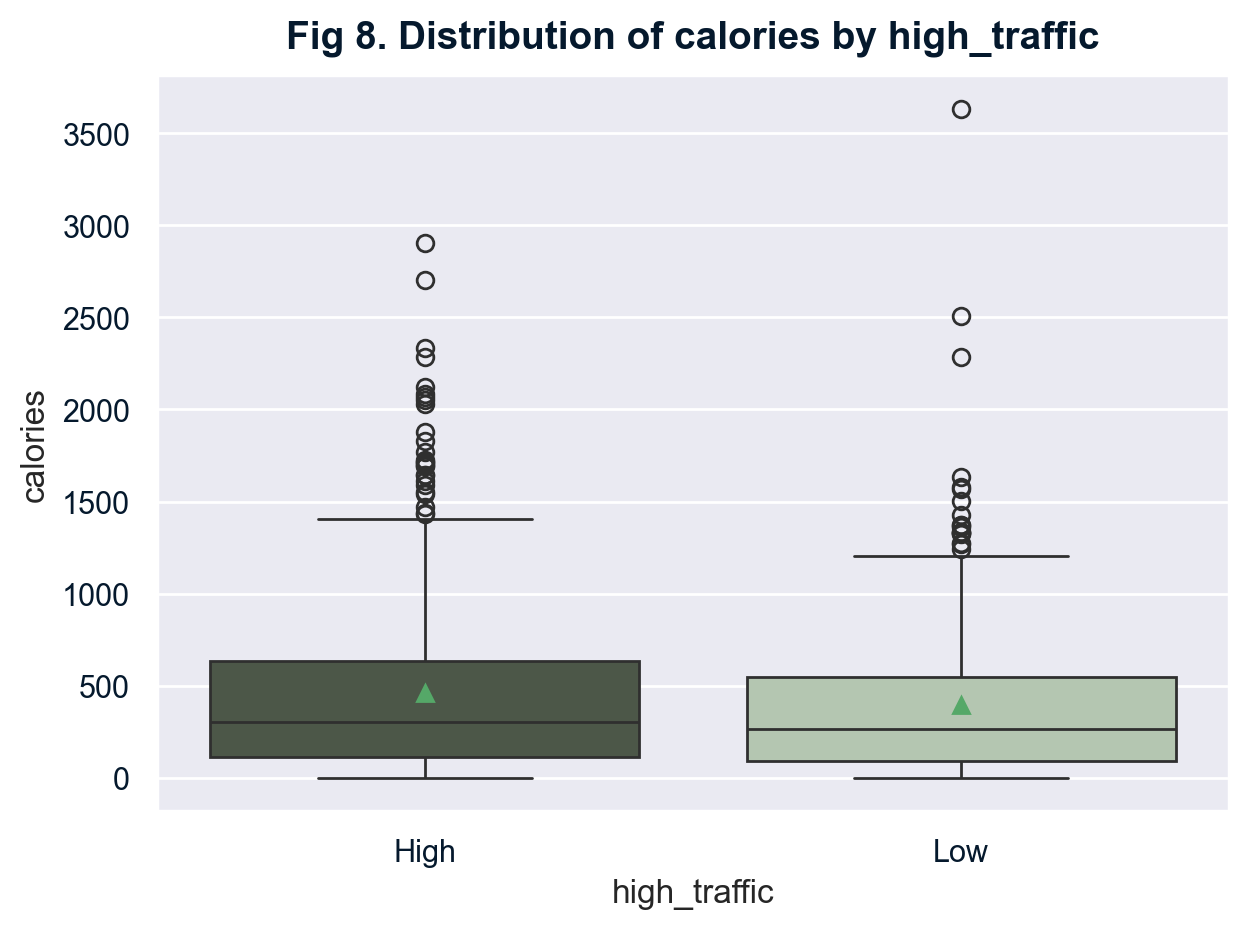

In [72]:
# Generate a box plot to analyze calories distribution across high- and low-traffic recipes
boxplot_with_hue(df, "calories", "high_traffic", 8)

#### Summary

Recipes associated with high traffic exhibit a significantly higher average calorie content of 463.57, compared to 394.88 for recipes not associated with high traffic. We will test this difference later using statistical tests. Visually, the boxplot reveals that the 'high traffic' group has a wider interquartile range, suggesting a greater variability in calorie content within this segment. Furthermore, this group displays a larger number of outliers, particularly on the higher end of the calorie scale, indicating the presence of recipes with exceptionally high calorie amounts. While both groups exhibit right-skewed distributions, as evidenced by the longer upper whiskers and the presence of outliers, the skewness appears more pronounced in the 'high traffic' group. The median calorie level is also slightly higher in the 'high traffic' group, aligning with the higher mean. In summary, high traffic recipes not only have a higher average calorie content but also a broader distribution and more frequent occurrences of high-calorie outliers.

#### 6.6.2 Visualizing the distribution of protein content across high-traffic and low-level traffic recipes

  high_traffic    protein
0         High  25.478411
1          Low  22.174083


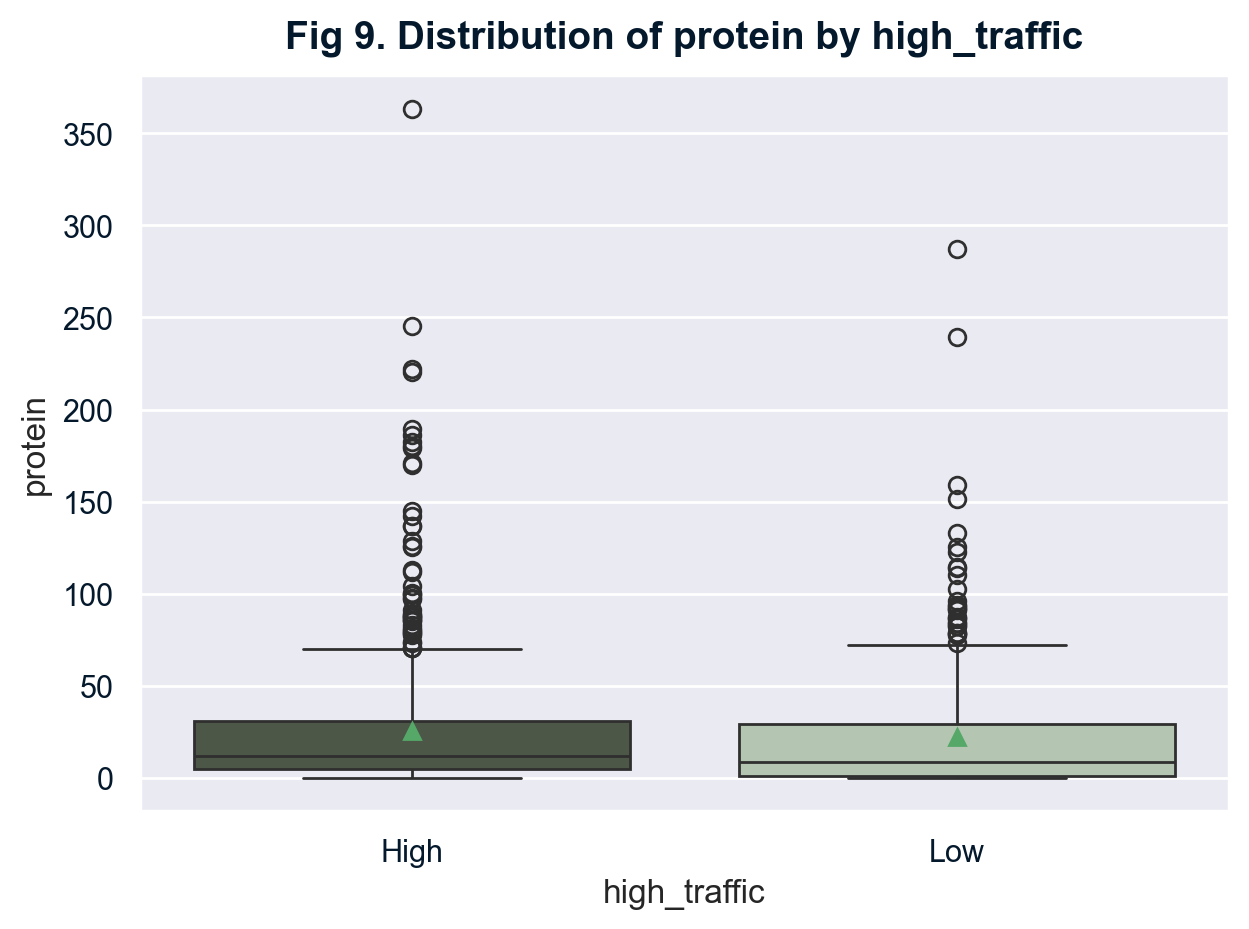

In [73]:
# Generate a box plot to analyze protein distribution across high- and low-traffic recipes
boxplot_with_hue(df, "protein", "high_traffic", 9)

#### Summary

Recipes associated with high traffic exhibit a slightly higher average protein content of 25.48 grams, compared to 22.17 grams for recipes not associated with high traffic . Visually, the boxplot reveals that the 'high traffic' group has a wider interquartile range, suggesting a greater variability in protein content. Furthermore, this group displays a larger number of outliers, particularly on the higher end of the protein scale, indicating the presence of recipes with significantly higher protein amounts within this segment. While both groups exhibit right-skewed distributions, the skewness appears more pronounced in the 'high traffic' group. The median protein level is slightly higher in the 'high traffic' group, aligning with the higher mean. In summary, high traffic recipes not only have a higher average protein content but also a broader distribution and more frequent occurrences of high-protein outliers. This assumption will be tested using a significance test.

#### 6.6.3 Visualizing the distribution of sugar content across high-traffic and low-level traffic recipes

  high_traffic      sugar
0         High   8.137607
1          Low  10.397333


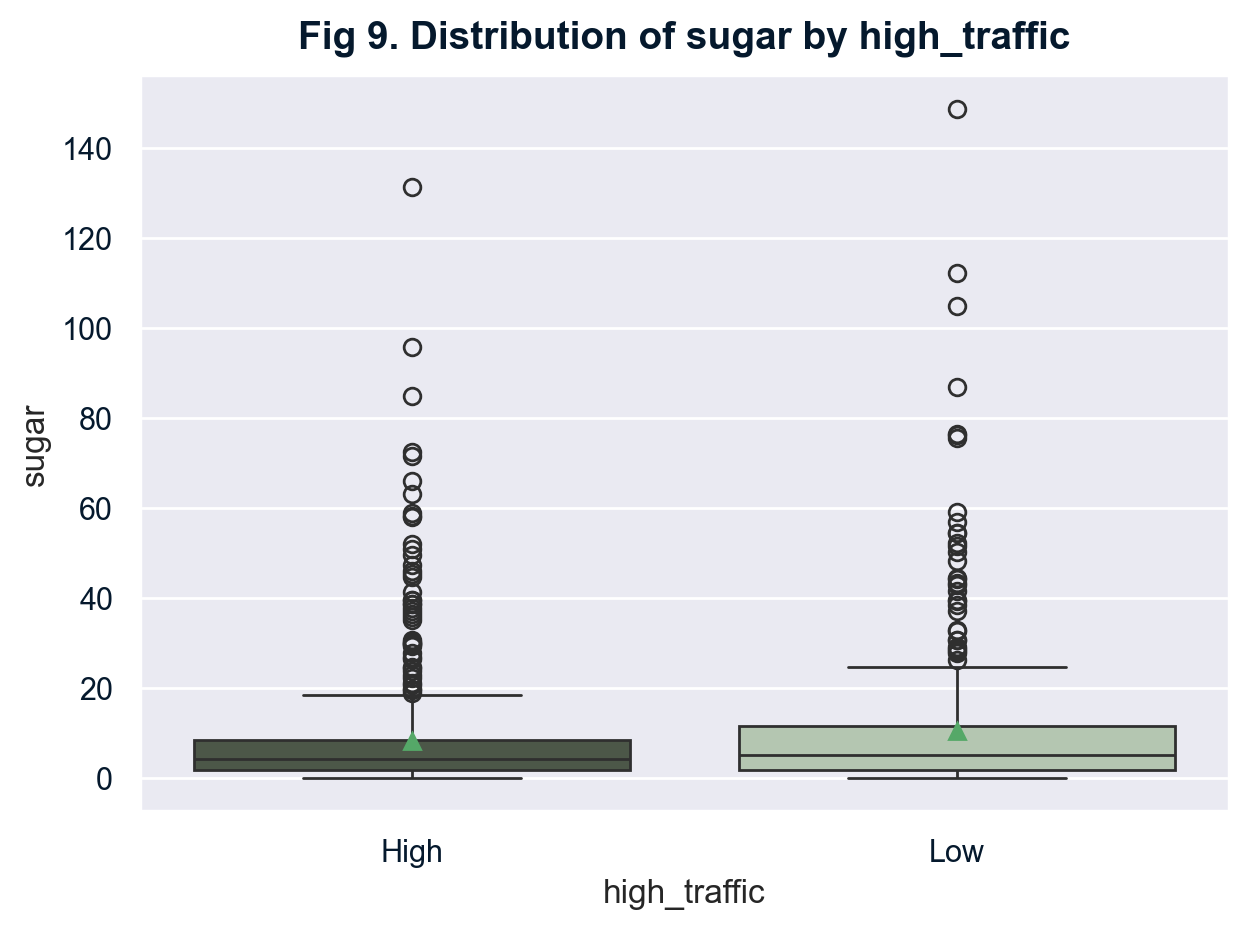

In [74]:
# Generate a box plot to analyze sugar distribution across high- and low-traffic recipes
boxplot_with_hue(df, "sugar", "high_traffic", 9)

Recipes associated with high traffic exhibit a slightly lower average sugar content of 8.14 grams, compared to 10.40 grams for recipes not associated with high traffic . Visually, the boxplot reveals that the 'high traffic' group has a slightly narrower interquartile range, suggesting less variability in sugar content within this segment. However, this group still displays a significant number of outliers, particularly on the higher end of the sugar scale, indicating the presence of recipes with exceptionally high sugar amounts, though they are less frequent than in the 'low traffic' group. While both groups exhibit right-skewed distributions, the skewness appears more pronounced in the 'low traffic' group due to the higher average and more frequent high-sugar outliers. The median sugar level is also slightly lower in the 'high traffic' group, aligning with the lower mean. In summary, high traffic recipes tend to have a lower average sugar content, and while they still have outliers, they show a less dispersed distribution of sugar compared to recipes not associated with high traffic. THis assumption will be tested using statistical tests.

6.6.4 Visualizing the distribution of carbohydrate content across high-traffic and low-level traffic recipes

  high_traffic  carbohydrate
0         High     37.985757
1          Low     30.736056


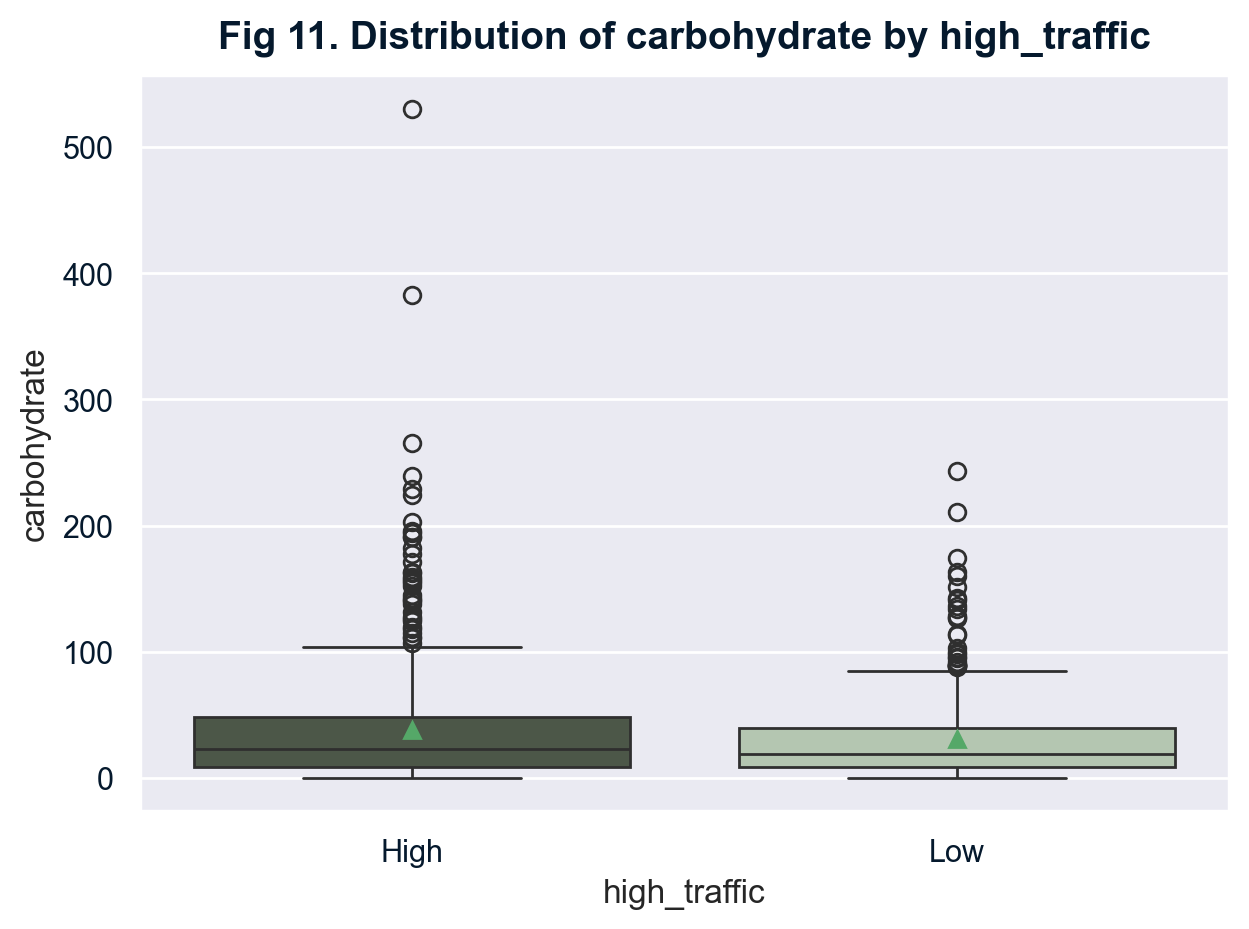

In [75]:
boxplot_with_hue(df, "carbohydrate", "high_traffic", 11)

Recipes associated with high traffic exhibit a significantly higher average carbohydrate content of 37.99 grams, compared to 30.74 grams for recipes not associated with high traffic . Visually, the boxplot reveals that the 'high traffic' group has a wider interquartile range, indicating a greater variability in carbohydrate content within this segment. Furthermore, this group displays a larger number of outliers, particularly on the higher end of the carbohydrate scale, indicating the presence of recipes with exceptionally high carbohydrate amounts. While both groups exhibit right-skewed distributions, the skewness appears more pronounced in the 'high traffic' group due to the higher average and more frequent high-carbohydrate outliers. The median carbohydrate level is also higher in the 'high traffic' group, aligning with the higher mean. In summary, high traffic recipes not only have a higher average carbohydrate content but also a broader distribution and more frequent occurrences of high-carbohydrate outliers. This assumption will be tested by means of a statistical significance test.

### 6.7 Analyzing the Distribution of the Servings Feature for High- and Low-Traffic Recipes
In this section, we will examine how different recipe servings are distributed across high-traffic and low-traffic recipes. 

In [76]:
# Create a contingency table (cross-tabulation) of `servings` vs `high_traffic`
# This counts the occurrences of each `servings` value split by `high_traffic` categories 
servings_counts_pivot = pd.crosstab(df['servings'], df['high_traffic'])

# Display the resulting pivot table
servings_counts_pivot

high_traffic  High  Low
servings               
1               99   70
2               98   76
4              220  147
6              118   67

<Figure size 2000x1500 with 0 Axes>

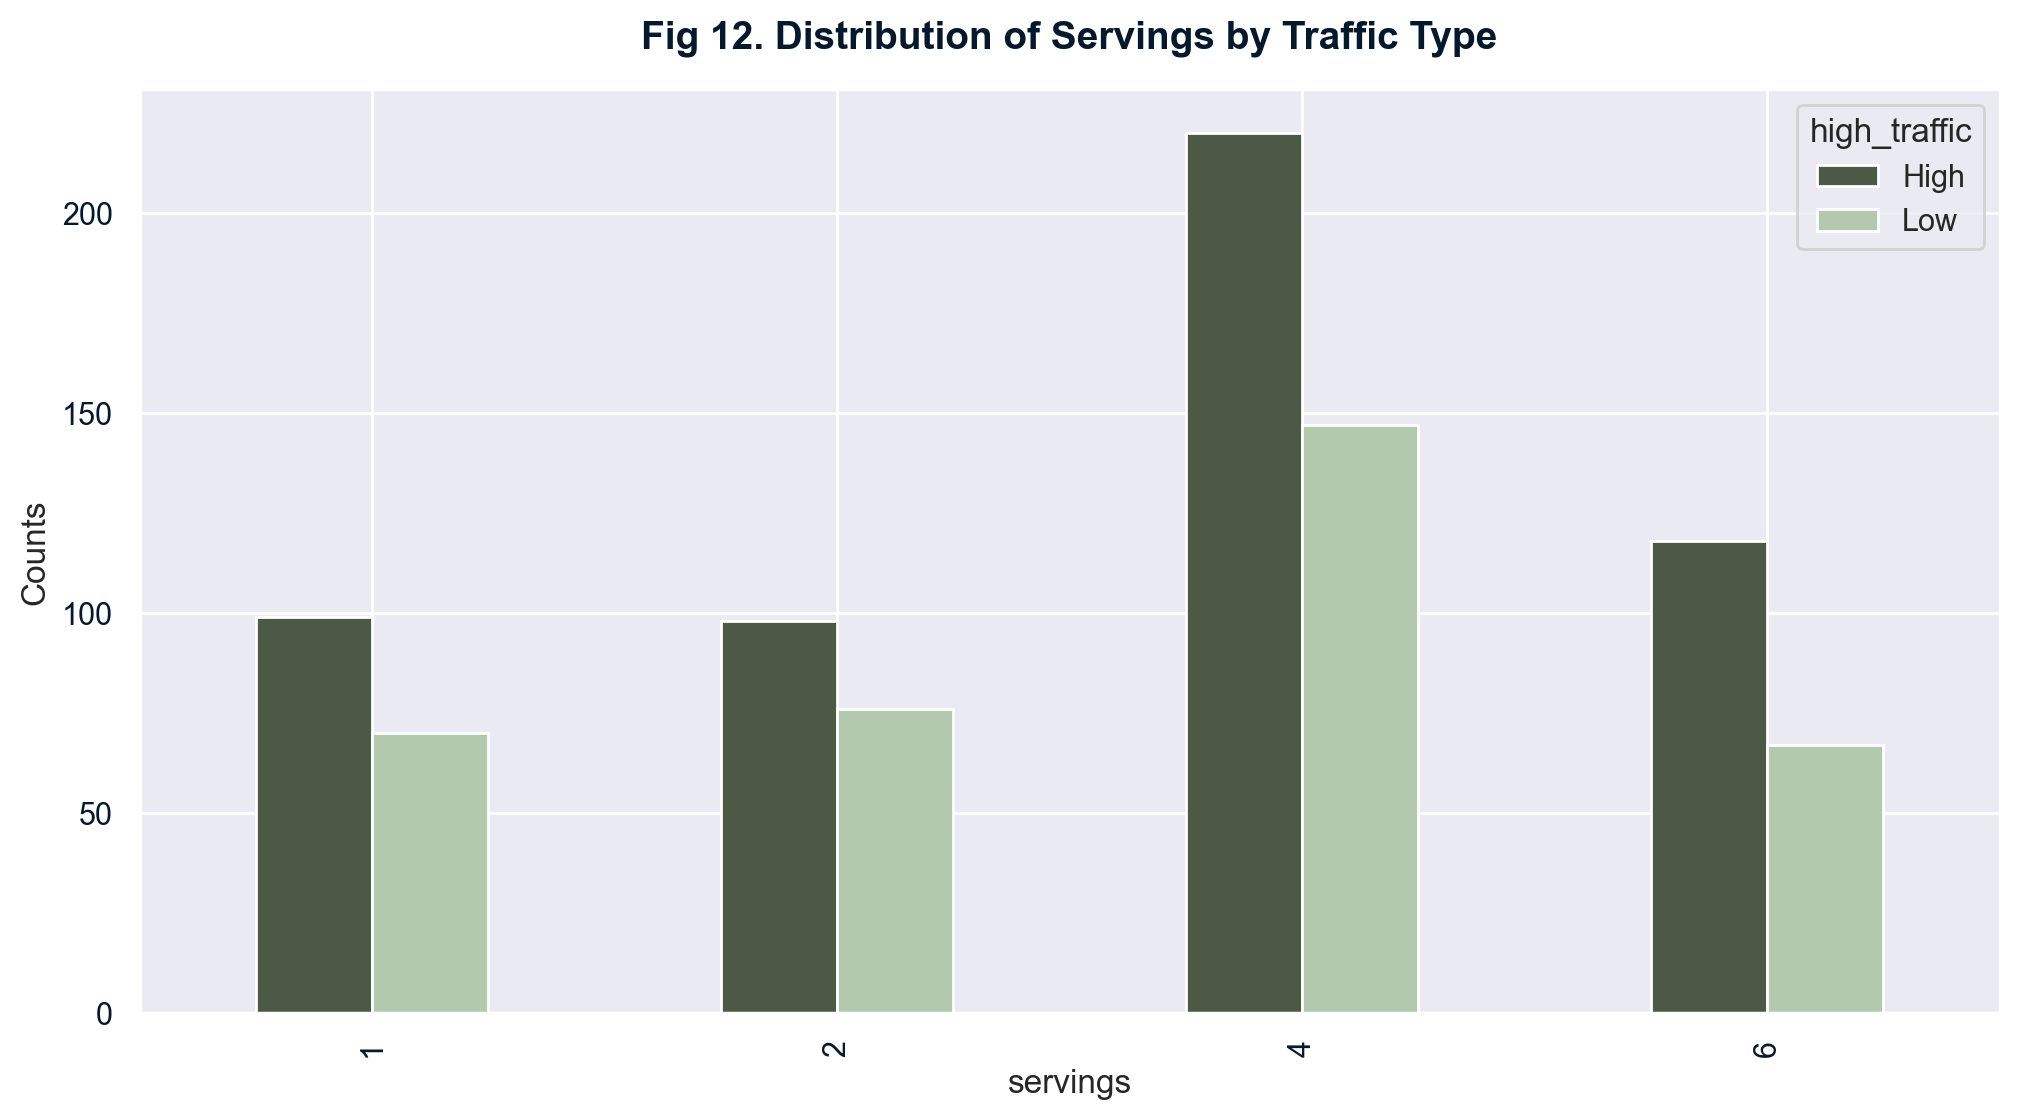

In [77]:
# Set the figure size to ensure readability
plt.figure(figsize=(20, 15))

servings_counts_pivot.plot(kind="bar", color=colors, ylabel="Counts", figsize=(12, 6))

# Set the title of the plot
plt.title("Fig 12. Distribution of Servings by Traffic Type", fontweight="bold", size=14, pad=15)

# Display the plot
plt.show()


### 6.8 Analyzing the Relationship between various Features
In this section, we will examine features in relation with other features in the dataset. This will be done using the pairplot and the correlation matrix heatmap.

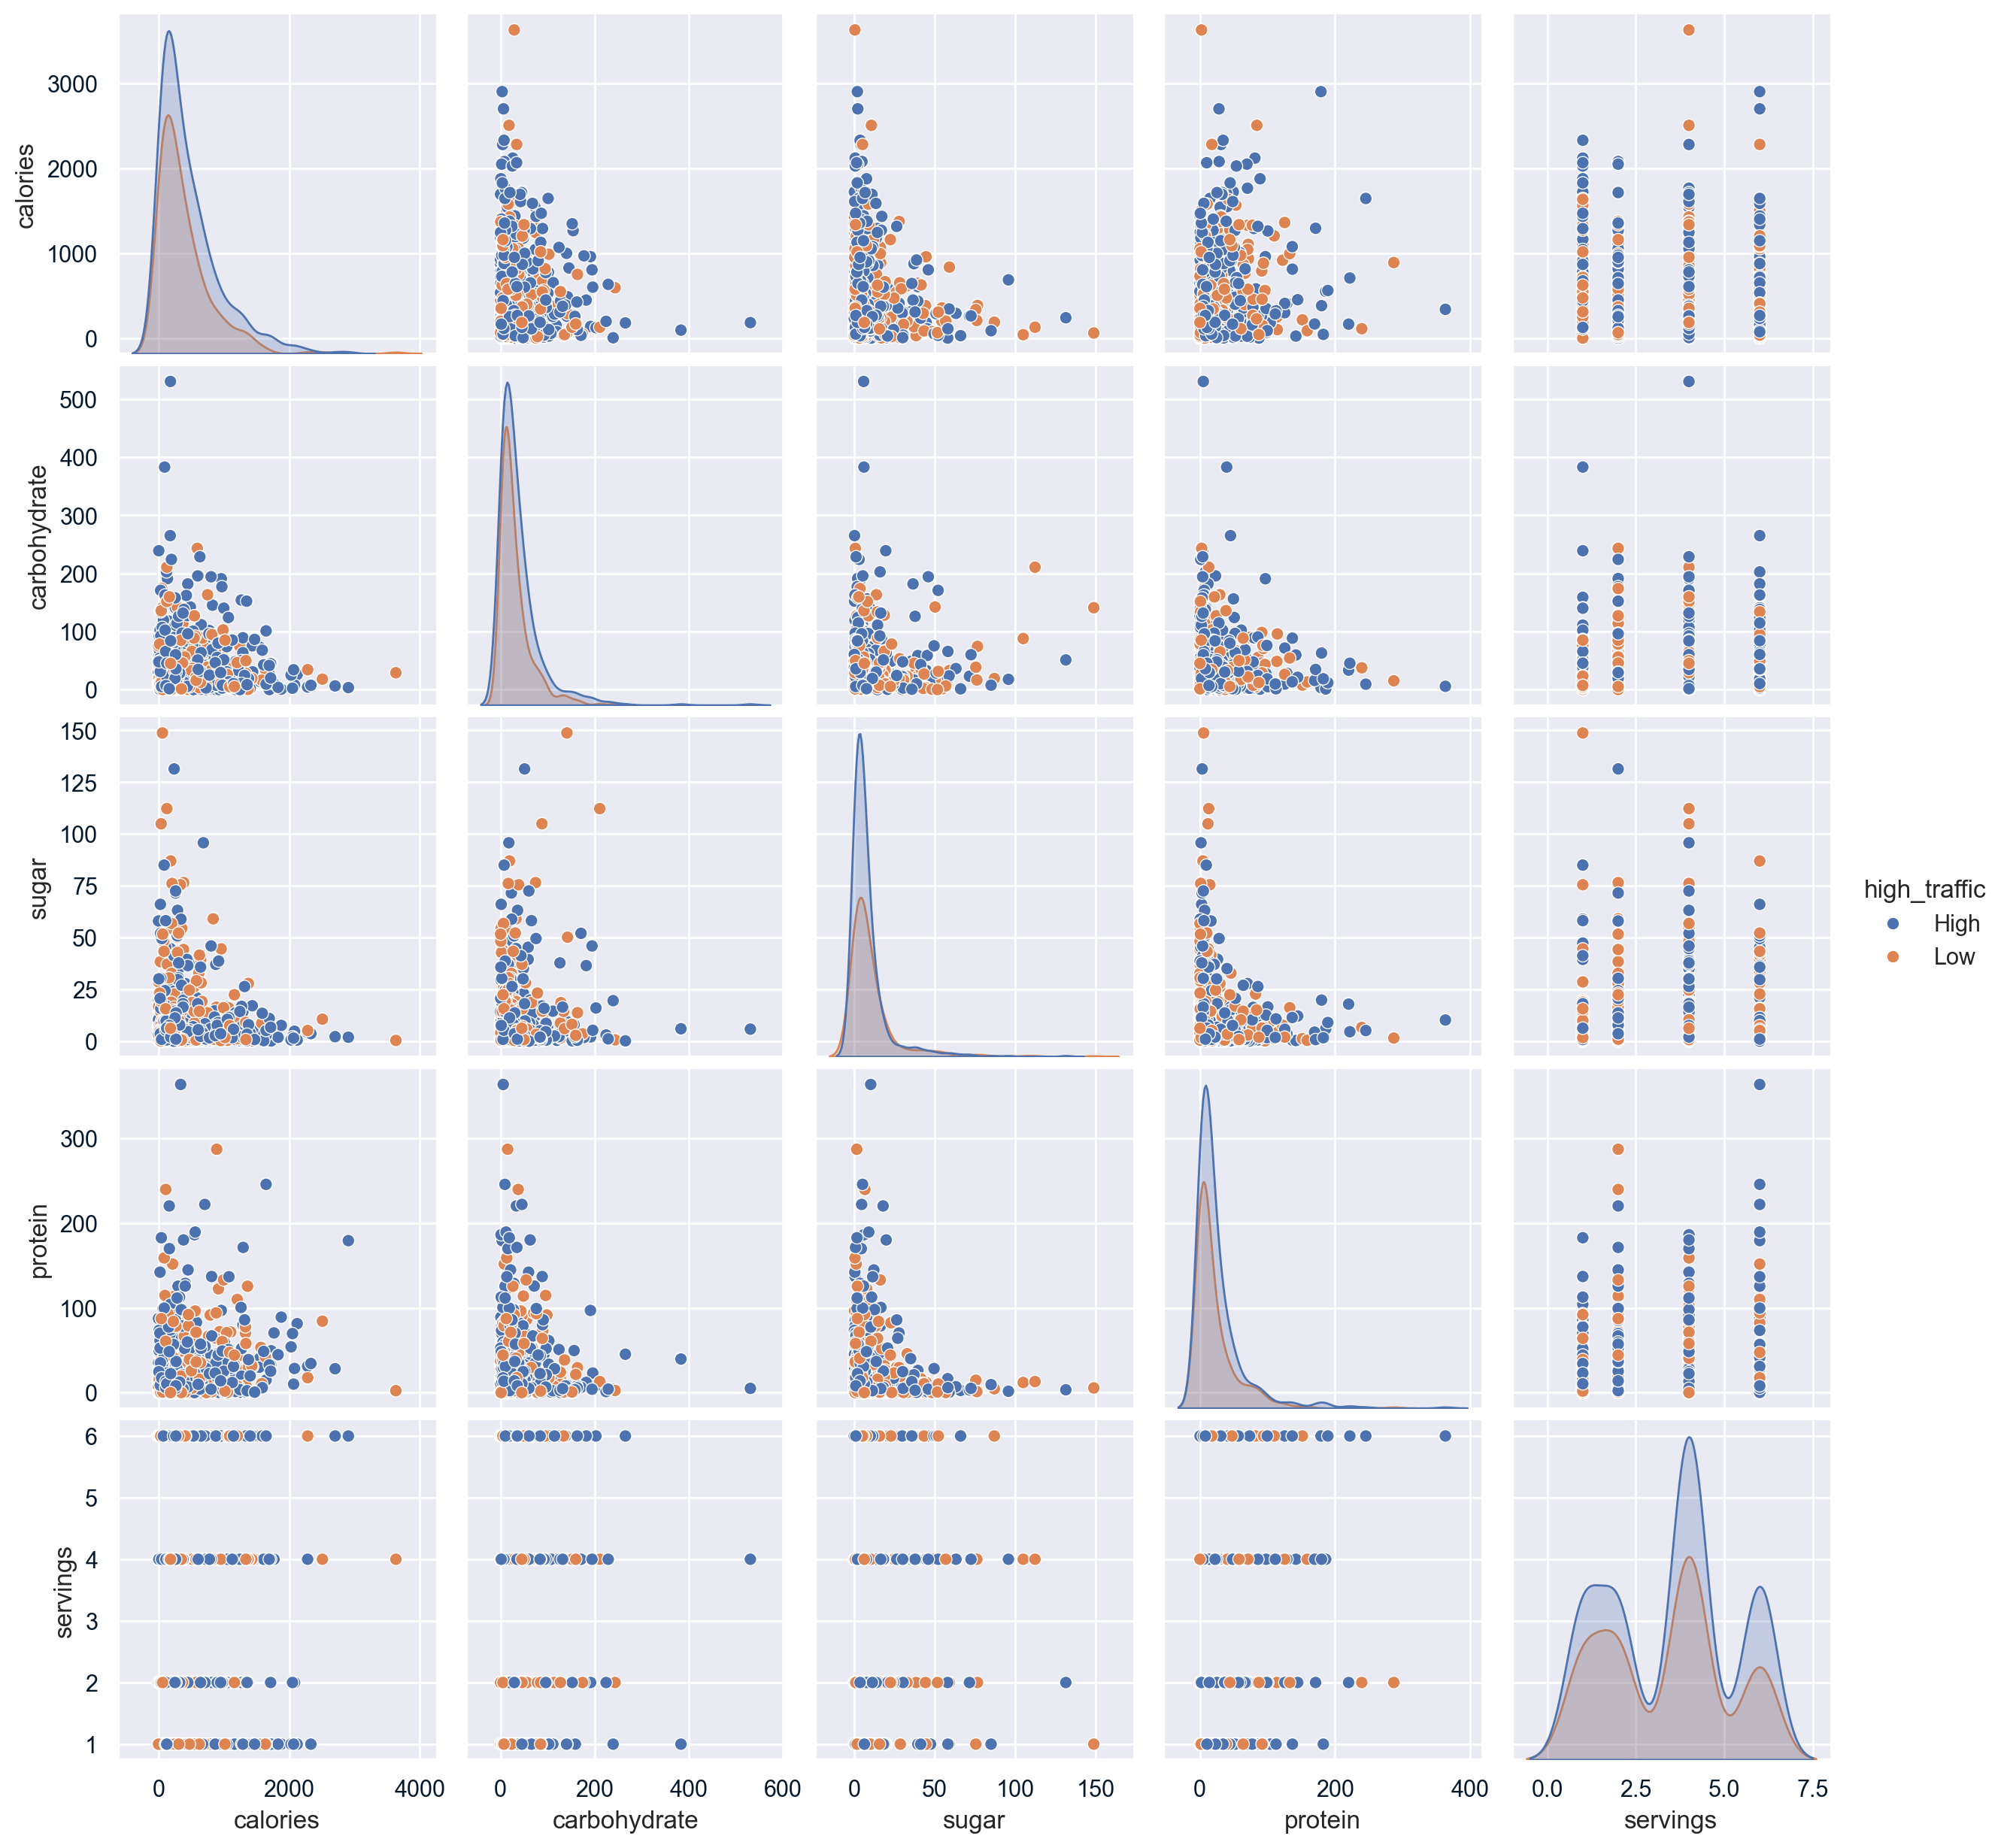

In [78]:
# Visualizing the pairplot of the various features
sns.pairplot(df.drop(columns = ["recipe"]), hue = "high_traffic")

<AxesSubplot: >

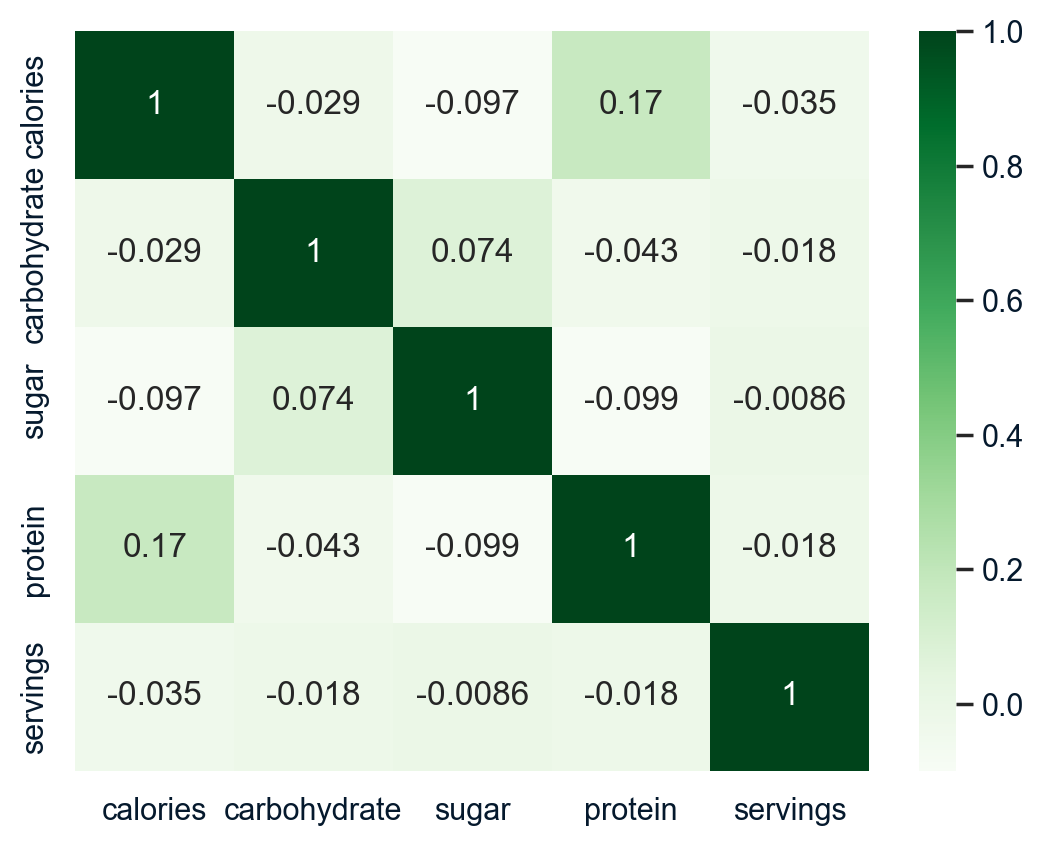

In [79]:
sns.heatmap(df.drop(columns = ["recipe"]).corr(), annot = True, cmap = "Greens")

#### Summary
Pair plots and correlation matrix heatmaps reveal no significant correlation between the variables, even when segmented into high-traffic and low-traffic recipes. This indicates that the features do not exhibit strong linear relationships, suggesting that other factors may influence recipe traffic.

### 7. Statistical Significance Test


In this section, we will conduct statistical significance tests to determine whether differences in key features between **high-traffic** and low-traffic recipes are meaningful or occur by chance. By applying tests such as the t-test, Mann-Whitney U test or chi-square test we aim to identify significant distinctions in numerical features, providing insights into factors that may influence recipe popularity.


#### 7.1 Statistical Significance Test between numerical and categorical columns


We will conduct statistical significance tests to evaluate whether there are meaningful differences in numerical features across categorical groups. By applying tests such as t-tests, Welch’s t-test, or the Mann-Whitney U test, we aim to determine whether variations in numerical attributes, such as calories, protein, or carbohydrate content, are statistically significant when grouped by categorical variables like high-traffic vs. low-traffic recipes. This analysis provides insights into whether certain numerical characteristics are associated with categorical classifications.

To perform this task, we create a python function called `perform_stat_test` function which evaluates the statistical significance of differences between two independent groups by systematically checking for normality and variance equality. It first applies the Shapiro-Wilk test to assess normality, followed by Levene’s test to determine variance equality. Based on these results, it selects the appropriate hypothesis test: *Student’s t-test* if normality and equal variance assumptions are met, *Welch’s t-test* if variances are unequal, or the *Mann-Whitney U test* if normality is not satisfied. The function then interprets the p-value, determining whether there is a statistically significant difference between the two groups. 

- ***Alpha***: 0.05

- ***Null Hypothesis***: There is no significant difference in the distribution of the continuous variable between the high traffic and the low traffic groups.

- ***Alternative Hypothesis***: There is significant difference in the distribution of the continuous variable between the high traffic and the low traffic groups.

In [80]:
def perform_stat_test(group_1, group_2):
    """
    Performs an independent t-test if assumptions are met; otherwise, performs the Mann-Whitney U test.
    
    Parameters:
    - group_1: array-like, first sample
    - group_2: array-like, second sample
    
    Returns:
    - A dictionary containing normality test results, variance test results, 
      the appropriate statistical test results, and interpretation of the p-value.
    """
    # Check normality using Shapiro-Wilk test
    normality_g1 = shapiro(group_1)
    normality_g2 = shapiro(group_2)

    # Check homogeneity of variances using Levene’s test
    variance_test = levene(group_1, group_2)

    # Determine if assumptions are met
    normality_pass = (normality_g1.pvalue > 0.05) and (normality_g2.pvalue > 0.05)
    equal_variance = variance_test.pvalue > 0.05

    # Choose the appropriate test
    if normality_pass and equal_variance:
        test_name = "t-test (Student's)"
        stat, p_value = ttest_ind(group_1, group_2, equal_var=True)
    elif normality_pass:
        test_name = "t-test (Welch's)"
        stat, p_value = ttest_ind(group_1, group_2, equal_var=False)
    else:
        test_name = "Mann-Whitney U test"
        stat, p_value = mannwhitneyu(group_1, group_2, alternative="two-sided")

    # Interpretation of the p-value
    if p_value < 0.05:
        interpretation = "There is a significant difference between the two groups (reject null hypothesis)."
    else:
        interpretation = "There is no significant difference between the two groups (fail to reject null hypothesis)."

    return {
        "Shapiro-Wilk Test (Group 1)": normality_g1,
        "Shapiro-Wilk Test (Group 2)": normality_g2,
        "Levene’s Test for Equality of Variances": variance_test,
        test_name: {"Statistic": stat, "p-value": p_value},
        "Interpretation": interpretation
    }


In [81]:
# Filter the dataset to create a subset of high-traffic recipes
high_df = df[df["high_traffic"] == "High"]  # Selects rows where 'high_traffic' is labeled as "High"

# Filter the dataset to create a subset of low-traffic recipes
low_df = df[df["high_traffic"] == "Low"]  # Selects rows where 'high_traffic' is labeled as "Low"


In [82]:
# Extract the 'protein' values from the high-traffic recipes
high_protein = high_df["protein"].values  

# Extract the 'protein' values from the low-traffic recipes
low_protein = low_df["protein"].values  

# Perform a statistical significance test to compare protein content between high-traffic and low-traffic recipes
perform_stat_test(high_protein, low_protein)  


{'Shapiro-Wilk Test (Group 1)': ShapiroResult(statistic=0.6200875043869019, pvalue=1.1803351834957675e-32),
 'Shapiro-Wilk Test (Group 2)': ShapiroResult(statistic=0.6580303907394409, pvalue=2.880744997353789e-26),
 'Levene’s Test for Equality of Variances': LeveneResult(statistic=0.13372804664499746, pvalue=0.7146841662374928),
 'Mann-Whitney U test': {'Statistic': 109837.5,
  'p-value': 0.000357394690555905},
 'Interpretation': 'There is a significant difference between the two groups (reject null hypothesis).'}

In [83]:
# Extract the 'carbohydrate' values from the high-traffic recipes
high_carb = high_df["carbohydrate"].values  

# Extract the 'protein' values from the low-traffic recipes
low_carb = low_df["carbohydrate"].values  

# Perform a statistical significance test to compare carbohydrate content between high-traffic and low-traffic recipes
perform_stat_test(high_carb, low_carb)  


{'Shapiro-Wilk Test (Group 1)': ShapiroResult(statistic=0.6600355505943298, pvalue=2.779197783762118e-31),
 'Shapiro-Wilk Test (Group 2)': ShapiroResult(statistic=0.7512133121490479, pvalue=6.535809787419606e-23),
 'Levene’s Test for Equality of Variances': LeveneResult(statistic=5.415818934508766, pvalue=0.02017785278242277),
 'Mann-Whitney U test': {'Statistic': 103655.0,
  'p-value': 0.05245571229890103},
 'Interpretation': 'There is no significant difference between the two groups (fail to reject null hypothesis).'}

In [84]:
# Extract the "sugar" values from the high-traffic recipes
high_sugar = high_df["sugar"].values  

# Extract the "sugar" values from the low-traffic recipes
low_sugar = low_df["sugar"].values  

# Perform a statistical significance test to compare sugar content between high-traffic and low-traffic recipes
perform_stat_test(high_sugar, low_sugar)  


{'Shapiro-Wilk Test (Group 1)': ShapiroResult(statistic=0.5531549453735352, pvalue=1.0294068057202226e-34),
 'Shapiro-Wilk Test (Group 2)': ShapiroResult(statistic=0.5680221319198608, pvalue=6.905595149295429e-29),
 'Levene’s Test for Equality of Variances': LeveneResult(statistic=4.698740160619231, pvalue=0.030448332860387034),
 'Mann-Whitney U test': {'Statistic': 88245.0, 'p-value': 0.03367288630253555},
 'Interpretation': 'There is a significant difference between the two groups (reject null hypothesis).'}

In [85]:
# Extract the "calories" values from the high-traffic recipes as a NumPy array
high_calories = high_df["calories"].values  

# Extract the "calories" values from the low-traffic recipes as a NumPy array
low_calories = low_df["calories"].values  

# Perform a statistical significance test to compare calorie content between high-traffic and low-traffic recipes
perform_stat_test(high_calories, low_calories)  


{'Shapiro-Wilk Test (Group 1)': ShapiroResult(statistic=0.8231140375137329, pvalue=7.69121475447938e-24),
 'Shapiro-Wilk Test (Group 2)': ShapiroResult(statistic=0.7754628658294678, pvalue=6.99985992859738e-22),
 'Levene’s Test for Equality of Variances': LeveneResult(statistic=4.036436595304279, pvalue=0.044828281093573556),
 'Mann-Whitney U test': {'Statistic': 104143.5,
  'p-value': 0.038622041535305136},
 'Interpretation': 'There is a significant difference between the two groups (reject null hypothesis).'}

### 7.2 Can we observe any association between the category and high_traffic variables?
We will use the chi-squared test of independence:

Null hypothesis: The category and high_traffic variables are independent.

Alternative hypothesis: The category and high_traffic variables are dependent.

In [86]:
# create a contingency table of category and high_traffic
contingency_table = pd.crosstab(df['category'], df['high_traffic'])

# calculate the chi-squared test statistic, p-value, degrees of freedom, and expected frequencies
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# print the results
print('Chi-Squared Statistic:', chi2_stat)
print('Degrees of Freedom:', dof)
print('p-value:', p_val)

if p_val < 0.05:
  print("There is evidence to suggest the presence of a relationship between the high_traffic and the category variables.")
else:
  print("There is not enough evidence to suggest that there is a significant relationship between the high_traffic and the servings variables.")

Chi-Squared Statistic: 303.7392952275297
Degrees of Freedom: 9
p-value: 4.201574583161359e-60
There is evidence to suggest the presence of a relationship between the high_traffic and the category variables.


#### Summary
Based on our analysis, we have observed that there exists a significant association between high traffic and recipe category. We also observed that except for carbohydrate, there is evidence to suggest that there is a difference in the distribution between these variables.

### 8. Model Development


#### Overview of the Recipe Traffic Prediction Problem  

Recipe traffic prediction is a classification problem, where the goal is to predict whether a recipe will generate high traffic or low traffic based on various features. Since the target variable is categorical, the task falls under supervised learning and can be approached using models like logistic regression, decision trees, and random forests 

#### Evaluation Metrics 
The objective is to predict which recipes will be popular (high-traffic) at least 80% of the time while minimizing the chance of recommending low-traffic recipes. This means the model should prioritize high recall for high-traffic recipes (so we don’t miss popular ones) while also reducing false positives (incorrectly labeling low-traffic recipes as high-traffic). High recall (sensitivity) for high-traffic recipes indicates the model's ability to correctly identify popular recipes. A high recall ensures that most truly high-traffic recipes are accurately classified, minimizing the risk of missing popular recommendations.

Other metrics for evaluating the models include:

Accuracy: The proportion of correct predictions (both true positives and true negatives) out of all predictions made. It’s a general measure of how often the model is correct.

Precision: The proportion of true positive predictions out of all predicted positives. It measures the accuracy of positive predictions, indicating how many of the predicted high-traffic recipes are actually high-traffic.

F1-Score: The harmonic mean of precision and recall. It provides a balance between precision and recall, useful when you need to consider both false positives and false negatives.

AUC Score (Area Under the Curve): A metric that measures the ability of a model to distinguish between classes. It’s based on the ROC curve and provides a value between 0 and 1, where 1 indicates perfect classification and 0.5 indicates a random classifier.


### Steps in Data Modelling
- Encodeing the tareget class using one hot encoding with '1' representing high-traffic recipes and '0' representing low-traffic recipes
- Splitting the data into training and test set using the 80:20 ratio, stratifying the class proportion of the target variable.
- Computing class weights to handle the issue of class imbalance in the dataset.
- Creating a custom scikit-learn transformer to log-transform the highly skewed features, this is to prevent the effect of outliers.
- Creating a pipeline that consists of the log transformer and the one hot encoding to encode the categorical columns of the dataset to scale the data and including a predictor
- Training three models using the training dataset including a baseline model.


### Model Selection
The DummyClassifier with the "most_frequent" strategy, will be used as our baseline model.  It  predicts the most frequent class in the training data for all instances, without learning from the features. This approach serves as a baseline model to establish a benchmark for comparison. It is used to set a reference point for model performance, helping to assess if more advanced models offer significant improvement. The DummyClassifier is simple and computationally efficient, making it an ideal starting point for quickly evaluating the dataset's characteristics, especially in cases of class imbalance. If more complex models fail to outperform this baseline, it indicates that the dataset may not contain enough informative features for better predictions.

Logistic Regression and Random Forest are both suitable for the recipe traffic prediction task, each offering distinct advantages. Logistic Regression is a simple, interpretable model that provides probabilistic outputs, making it useful for threshold-based decision-making. It also serves as an efficient baseline, offering insights into feature importance through its coefficients. However, it assumes a linear relationship between features and the target, which may not always hold.

On the other hand, Random Forest is a more powerful, non-linear model that can capture complex interactions between features. It is robust to overfitting and handles missing data and outliers well, making it a strong candidate for more intricate patterns in the data. While it provides useful feature importance insights, it is computationally heavier and less interpretable than Logistic Regression.

In [87]:
# Convert the 'high_traffic' column into a binary format where:
# - "High" is mapped to 1 (indicating a high-traffic recipe)
# - "Low" is mapped to 0 (indicating a low-traffic recipe)
df['high_traffic'] = np.where(df['high_traffic'] == 'High', 1, 0)

# Display the unique values in the 'high_traffic' column to verify the transformation
df.high_traffic.unique()


array([1, 0])

In [88]:
# split the data into features and target variable
X = df.drop(['high_traffic', 'recipe'], axis=1)
y = df['high_traffic']

In [89]:
# Computing class weights mitigate the effect of class imbalance

weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_labels = np.unique(y)
weights_dict = dict(zip(class_labels, weights))
weights_dict

{0: 1.2430555555555556, 1: 0.8364485981308412}

In [90]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
# Creating the log transformer class to reduce the effect of the skewness of the numerical features
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        # Initialize instance variables
        self.feature_names_in_ = None
        self.columns = None  # Will store the names of columns to transform
        self.new_cols = []  # List to keep track of columns selected for log transformation
        pass

    def fit(self, X, y=None):
        # Make a copy of the input DataFrame to avoid modifying the original data
        X = X.copy()
        
        # Identify columns to consider for log transformation by excluding specified categorical columns
        self.columns = X[num_cols].columns
        self.feature_names_in_ = self.columns
        
        # Loop through specified columns to assess skewness
        for col in self.columns:
            # Calculate skewness, ignoring NaN values
            col_skewness = stats.skew(X[col].dropna())  

            # Check if skewness is above the threshold and ensure values are non-negative
            if (col_skewness > 1 or col_skewness < -1) and (X[col] >= 0).all():
                self.new_cols.append(col)  # Store column names for transformation
        return self

    def transform(self, X):
        # Create a copy of the input DataFrame
        X = X.copy()

        # Loop through the columns identified for log transformation
        for col in self.new_cols:
            X[col] = np.log1p(X[col])  # Apply log transformation to the selected columns
            
        return X  # Return the transformed DataFrame

    def get_feature_names_out(self, input_features = None):
        return np.array([f"{name}" for name in self.feature_names_in_])


In [92]:
cat_cols = ['category']

In [93]:
# define the preprocessor for numerical features using logtransformer
log_transformer = LogTransformer()
# define the preprocessor for categorical features using OneHotEncoder
cat_transformer =  OneHotEncoder()

# combine the numerical and categorical transformers using ColumnTransformer for Logistic Regression
preprocessor = ColumnTransformer(transformers=[
    ('log', log_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
],
  remainder='passthrough',
      verbose=False)


#### Fitting a baseline model to the data

In [94]:
# create pipelines for the dummy classifier model
naive_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DummyClassifier(strategy = "most_frequent"))
])
naive_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log', LogTransformer(),
                                                  ['calories', 'sugar',
                                                   'protein', 'carbohydrate']),
                                                 ('cat', OneHotEncoder(),
                                                  ['category'])])),
                ('classifier', DummyClassifier(strategy='most_frequent'))])

In [95]:
# create pipelines for the logistic regression models
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight = weights_dict, random_state=42))
])

logreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log', LogTransformer(),
                                                  ['calories', 'sugar',
                                                   'protein', 'carbohydrate']),
                                                 ('cat', OneHotEncoder(),
                                                  ['category'])])),
                ('classifier',
                 LogisticRegression(class_weight={0: 1.2430555555555556,
                                                  1: 0.8364485981308412},
                                    random_state=42))])

In [96]:
# create pipelines for the random forest models
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log', LogTransformer(),
                                                  ['calories', 'sugar',
                                                   'protein', 'carbohydrate']),
                                                 ('cat', OneHotEncoder(),
                                                  ['category'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

### 9. Model Evaluation
In this section, we will 
- Evaluate the individual model's performance using various metrics using a function.
- Compare the built models performance.
- Carrying out Hyperparameter tuning on the best performing model.
- Model interpretation.

In [97]:
# Function to evaluate the fitted model using various evaluation metrics
def model_evaluation(clf, X_te, y_te, X_tr, y_tr, clf_name):
    
    # Predict the model
    pred_class = clf.predict(X_te)
    
    
    train_pred = clf.predict(X_tr)
    train_acc = accuracy_score(y_tr, train_pred)
    print('Training Accuracy: {:.2f}%\n'.format(train_acc * 100))
    
    test_acc = accuracy_score(y_te, pred_class)
    print('Test Accuracy: {:.2f}%\n'.format(test_acc * 100))
    
    report = classification_report(y_te, pred_class)
    print(report, '\n')
    
    cf_matrix = confusion_matrix(y_te, pred_class)
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', linewidths=0.5, linecolor='black')
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.title('Confusion Matrix')
    plt.show()
    
    y_pred_proba = clf.predict_proba(X_te)[:, 1]
    fpr, tpr, _ = roc_curve(y_te, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    # evaluate the accuracy, precision and recall of the logistic regression model
    acc = accuracy_score(y_te, pred_class)
    pre = precision_score(y_te, pred_class)
    rec = recall_score(y_te, pred_class)

    return clf_name, acc, pre, rec

#### Evaluating the Baseline Model

Training Accuracy: 59.92%

Test Accuracy: 59.22%

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        73
           1       0.59      1.00      0.74       106

    accuracy                           0.59       179
   macro avg       0.30      0.50      0.37       179
weighted avg       0.35      0.59      0.44       179
 



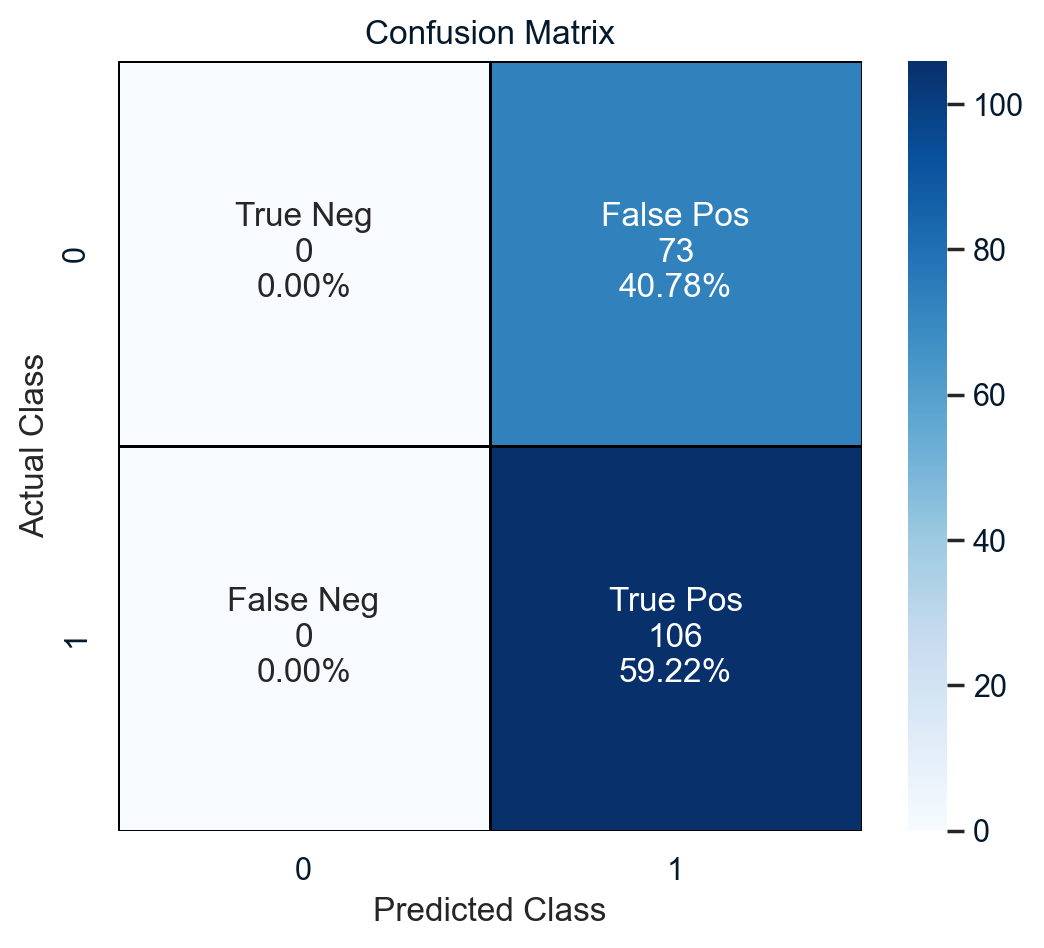

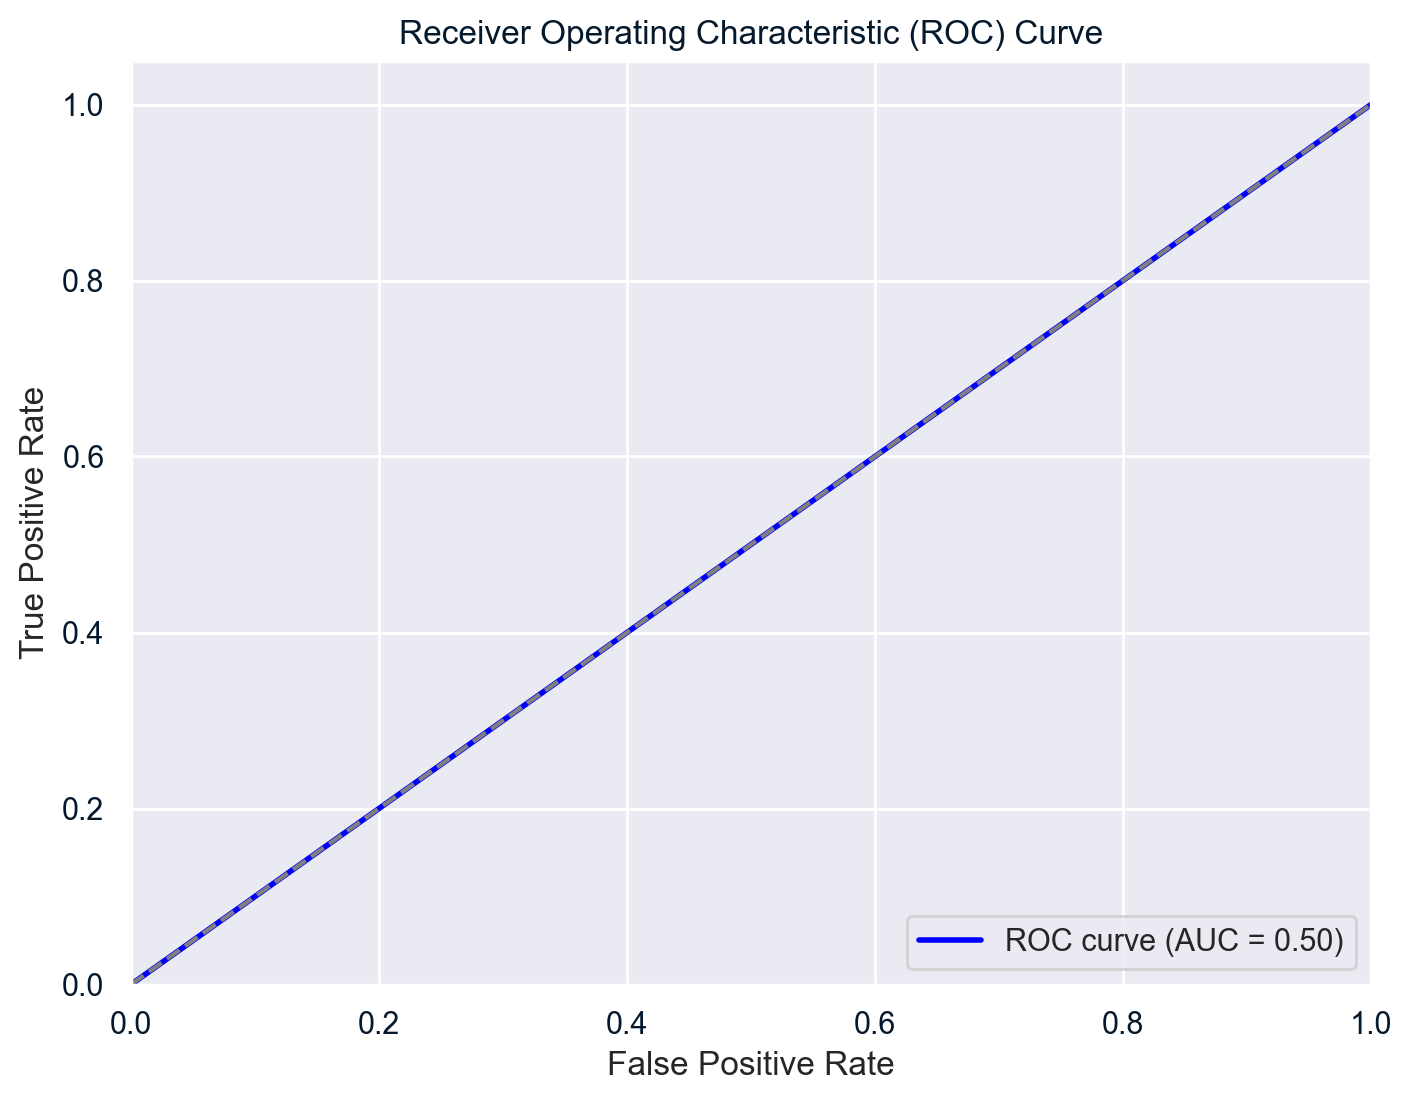

In [98]:
naive, acc_na, pre_na, rec_na = model_evaluation(naive_pipeline, X_test, y_test, X_train, y_train, "Naive Classifier")

#### Evaluating the Logistic Regression Model

Training Accuracy: 75.42%

Test Accuracy: 76.54%

              precision    recall  f1-score   support

           0       0.72      0.70      0.71        73
           1       0.80      0.81      0.80       106

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.76       179
weighted avg       0.76      0.77      0.76       179
 



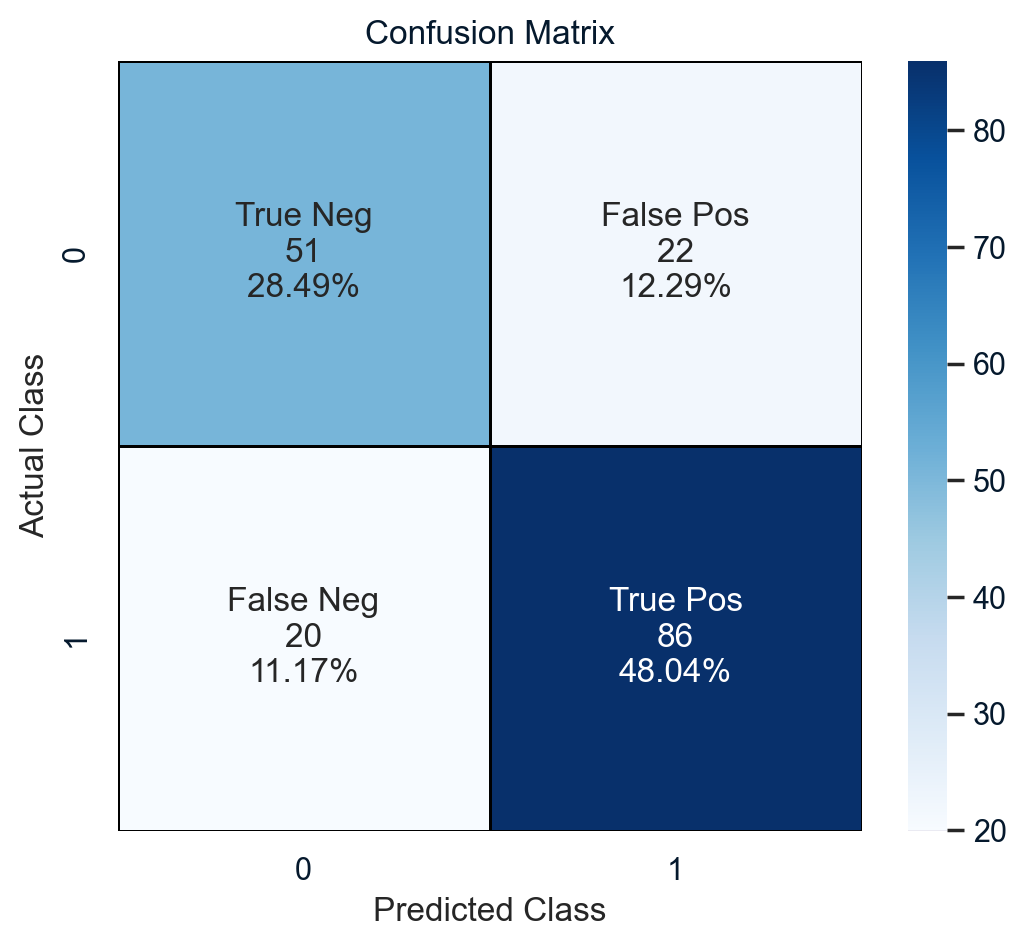

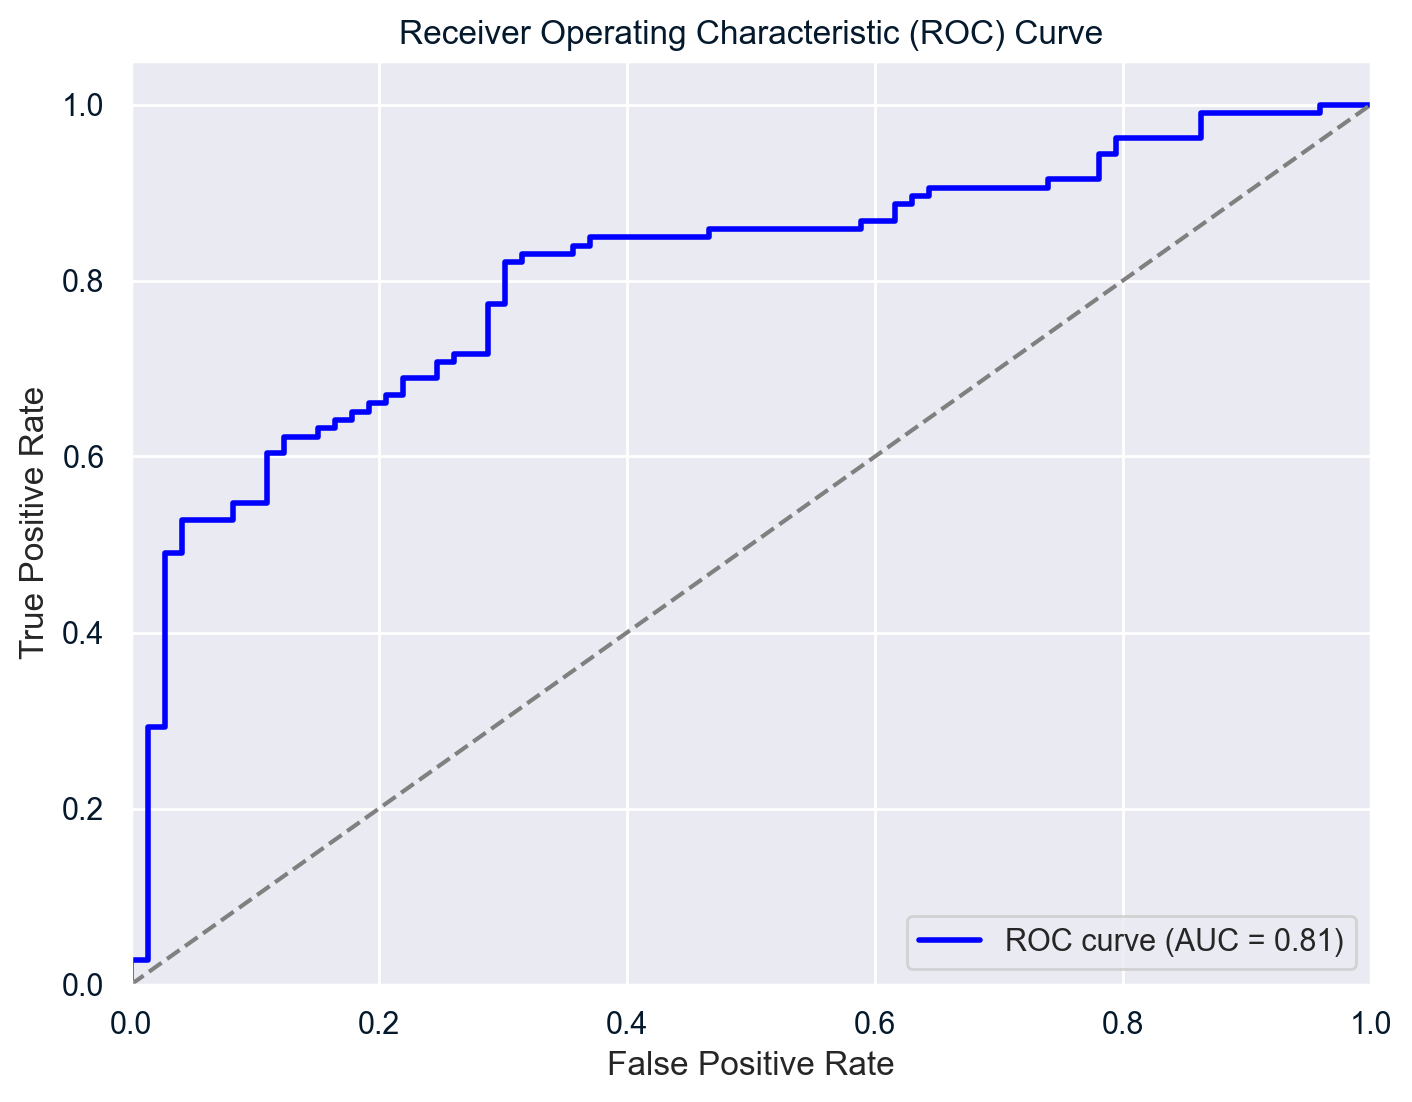

In [99]:
lr, acc_lr, pre_lr, rec_lr = model_evaluation(logreg_pipeline, X_test, y_test, X_train, y_train, "Logistic Regression Classifier")

#### Evaluating the Random Forest Classifier

Training Accuracy: 100.00%

Test Accuracy: 72.07%

              precision    recall  f1-score   support

           0       0.68      0.60      0.64        73
           1       0.75      0.80      0.77       106

    accuracy                           0.72       179
   macro avg       0.71      0.70      0.71       179
weighted avg       0.72      0.72      0.72       179
 



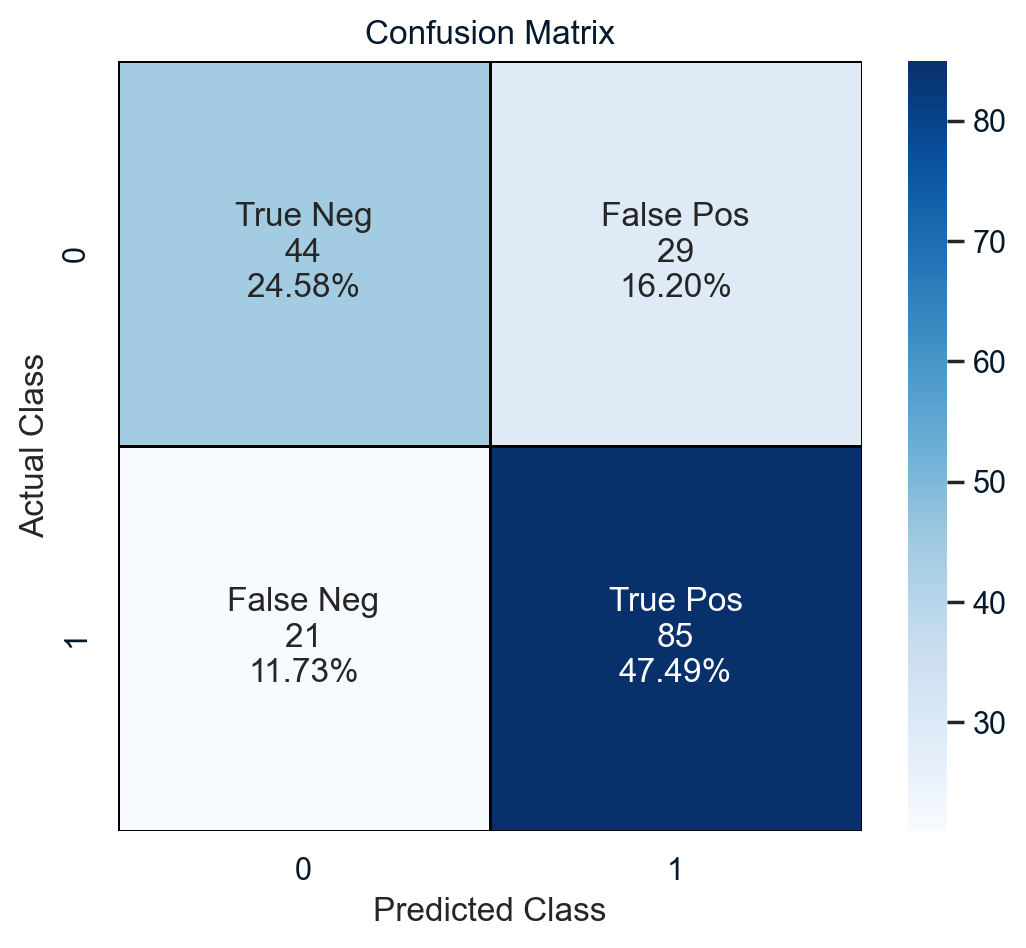

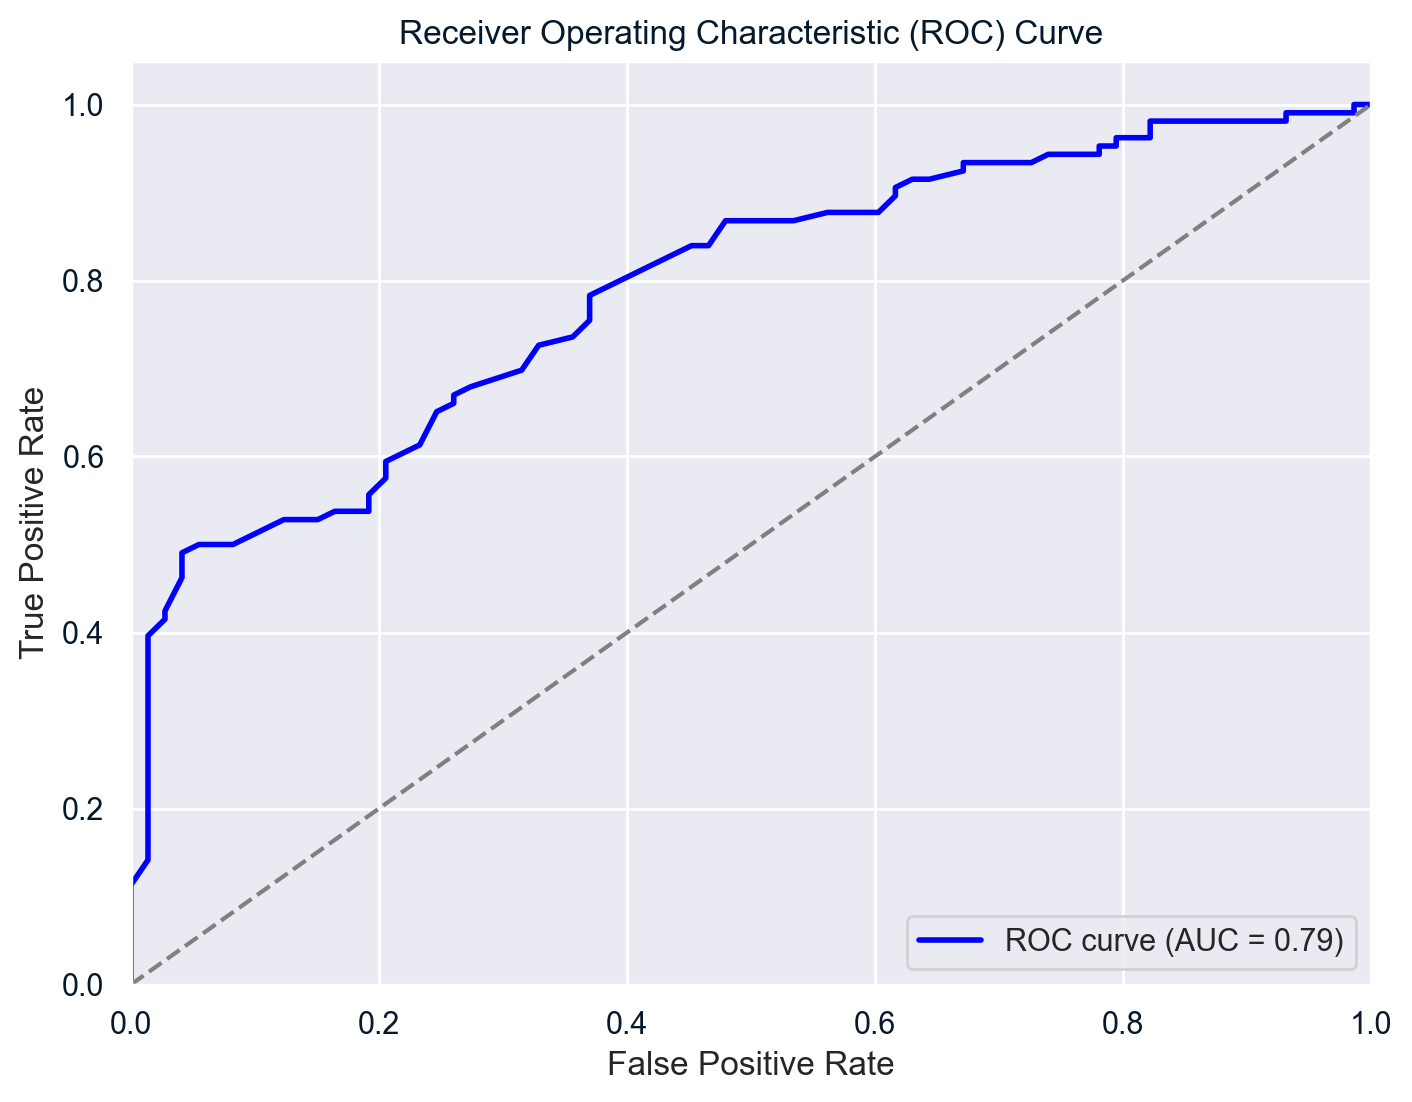

In [100]:
rf, acc_rf, pre_rf, rec_rf = model_evaluation(rf_pipeline, X_test, y_test, X_train, y_train, "Random Forest Classifier")

#### 9.2 Model Comparison

In this section, we compare the performance of different classifiers used for the recipe traffic prediction task. The models evaluated include the Naive Classifier, Logistic Regression, and Random Forest. The key metrics used for comparison are accuracy, precision, and recall.

In [101]:
results = {
    "Classifier": [naive, lr, rf],
    "Accuracy": [acc_na, acc_lr, acc_rf], 
    "Precision": [pre_na, pre_lr, pre_rf],
    "Recall": [rec_na, rec_lr, rec_rf],
}
results_df = pd.DataFrame(results)
# Set the 'Classifier' column as the index
results_df.set_index('Classifier', inplace=True)
results_df

Accuracy  Precision    Recall
Classifier                                                   
Naive Classifier                0.592179   0.592179  1.000000
Logistic Regression Classifier  0.765363   0.796296  0.811321
Random Forest Classifier        0.720670   0.745614  0.801887

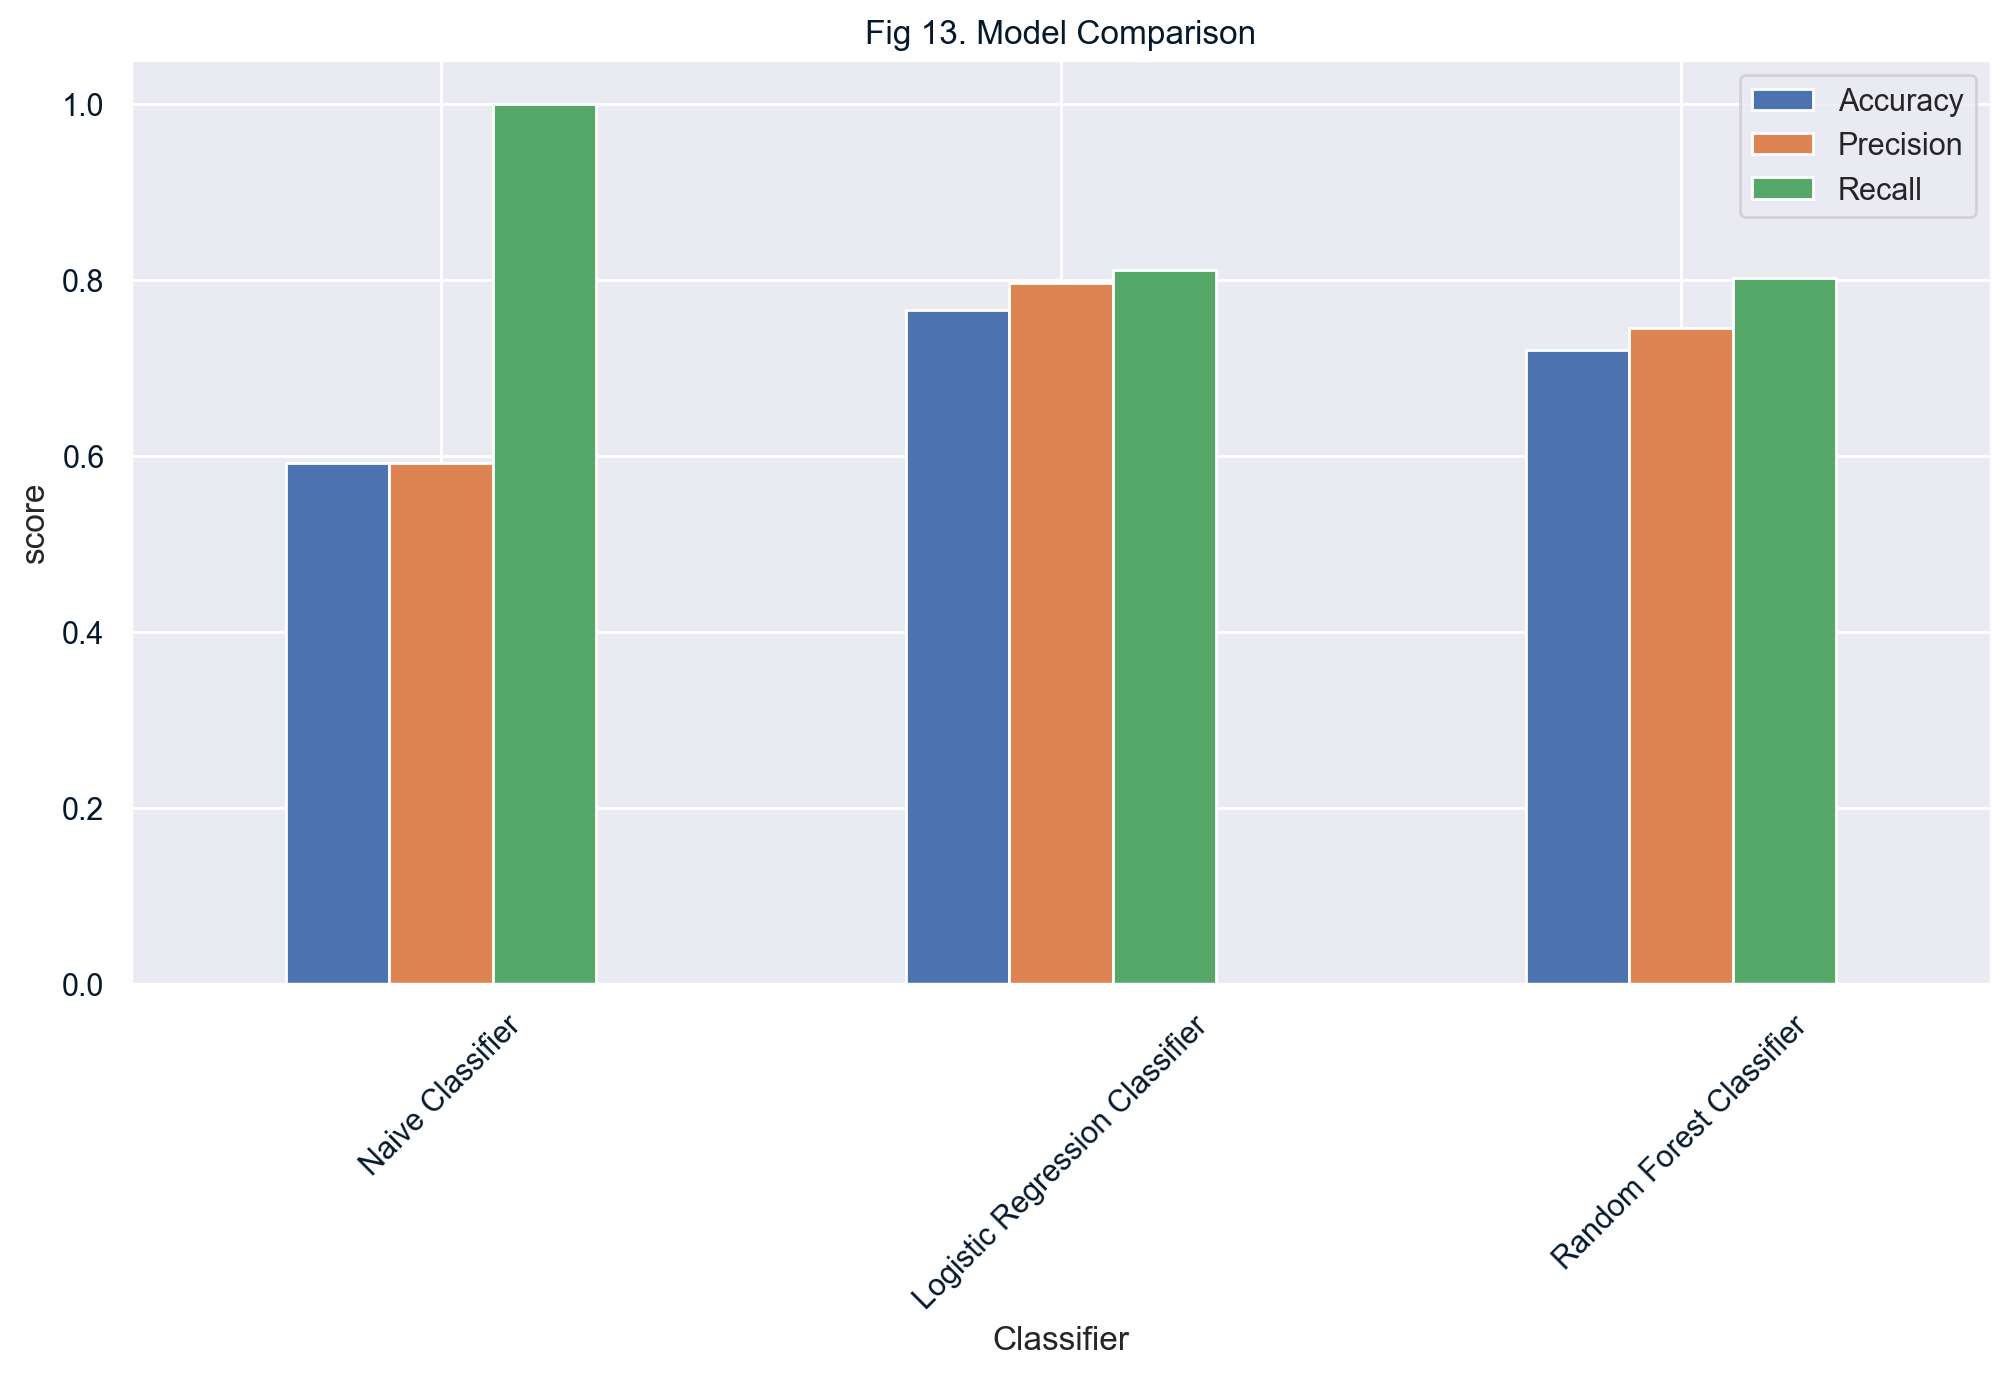

In [102]:
results_df.plot(kind = "bar", xlabel = "Classifier", ylabel = "score", title = "Fig 13. Model Comparison", figsize = (12, 6))
plt.xticks(rotation = 45)
plt.show()

#### Summary
Logistic Regression is the best classifier for this task due to its highest accuracy of 76.54%, which outperforms both the Naive Classifier and Random Forest. Additionally, it achieves a strong balance between **precision** (79.63%) and recall (81.13%), ensuring that it both accurately identifies high-traffic recipes and minimizes false negatives. While the Naive Classifier has high recall, it lacks precision, and Random Forest, though effective, does not match Logistic Regression in both metrics. Furthermore, Logistic Regression offers simplicity and interpretability, making it a reliable and understandable choice for predicting recipe popularity.

#### 9.3 Hyperparameter tuning

In this section, we perform hyperparameter tuning on the models to optimize their performance and improve prediction accuracy. Hyperparameter tuning involves adjusting the model's settings to find the optimal combination that maximizes the model's performance on unseen data.
Since the Logistic Regression performed best, key hyperparameters that can be tuned include:

Regularization strength (C): Controls the trade-off between fitting the training data well and keeping the model complexity low. Smaller values of C make the model more regularized (simpler), while larger values of C allow the model to fit the data more closely.

Solver (solver): The optimization algorithm used to find the best coefficients. Common solvers include 'liblinear', 'saga', and 'lbfgs'.

Penalty (penalty): Determines the type of regularization applied. Options are 'l2' (Ridge) and 'l1' (Lasso).

Maximum iterations (max_iter): The maximum number of iterations for the optimization algorithm to converge. A higher value of max_iter allows the solver to run for more iterations and potentially find a better solution, especially when dealing with more complex data or large datasets. If the algorithm is not converging with the default iterations, increasing max_iter can help.

In [103]:
# initialise a 5-fold stratified cross-validator
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [104]:
param_grid = {
    'classifier__C': [0.1, 1, 10, 100, 1000], 
    'classifier__penalty': ['l1', 'l2'], 
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__max_iter': [100, 1000, 10000], 
}

# perform GridSearchCV to find the best hyperparameters
log_search = GridSearchCV(estimator=logreg_pipeline,
                         param_grid=param_grid,
                         scoring='accuracy',
                         cv=stratified_kfold,
                         refit=True,
                         verbose=False,
                         return_train_score=True,
                         n_jobs=-1)


In [105]:
log_search.fit(X_train, y_train)

# print the results
print('Best hyperparameters:', log_search.best_params_)
print('Best accuracy:', log_search.best_score_)
print('Best precision:', precision_score(y_test, log_search.predict(X_test)))
print('Best recall:', recall_score(y_test, log_search.predict(X_test)))

Best hyperparameters: {'classifier__C': 0.1, 'classifier__max_iter': 100, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best accuracy: 0.7527972027972029
Best precision: 0.7962962962962963
Best recall: 0.8113207547169812


Training Accuracy: 75.98%

Test Accuracy: 76.54%

              precision    recall  f1-score   support

           0       0.72      0.70      0.71        73
           1       0.80      0.81      0.80       106

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.76       179
weighted avg       0.76      0.77      0.76       179
 



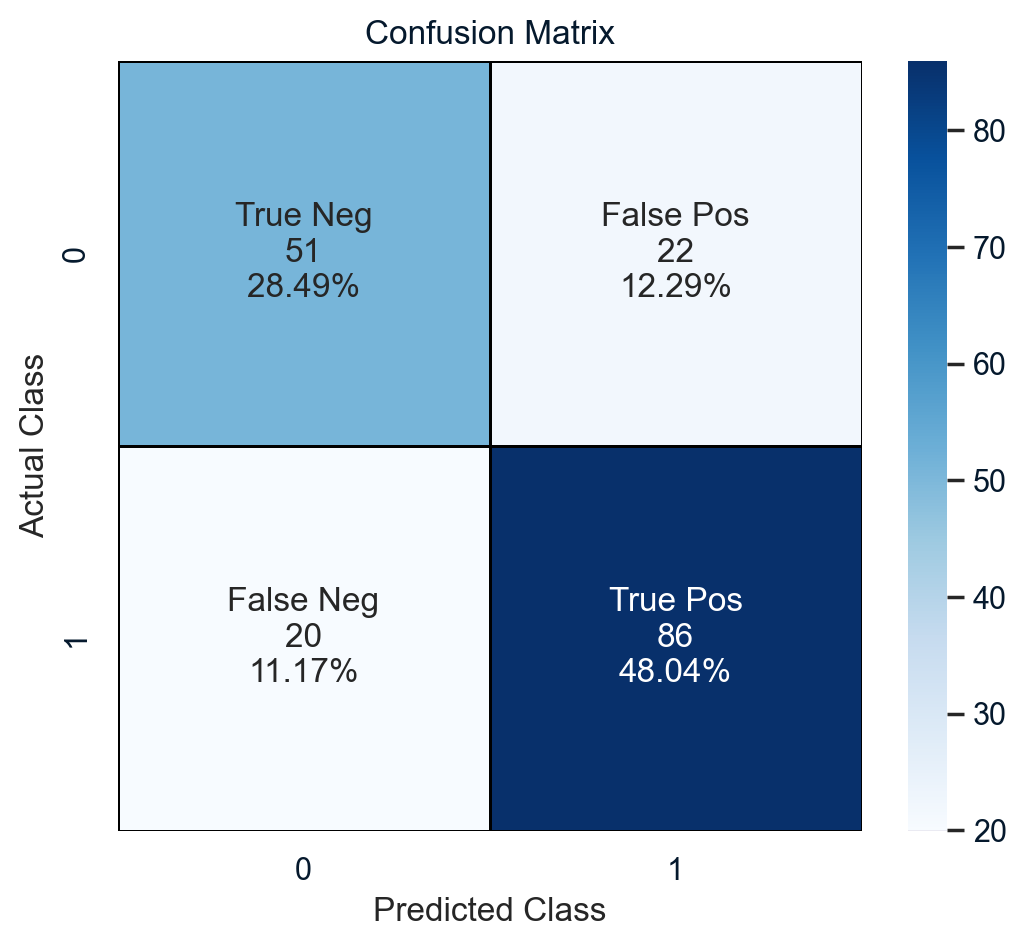

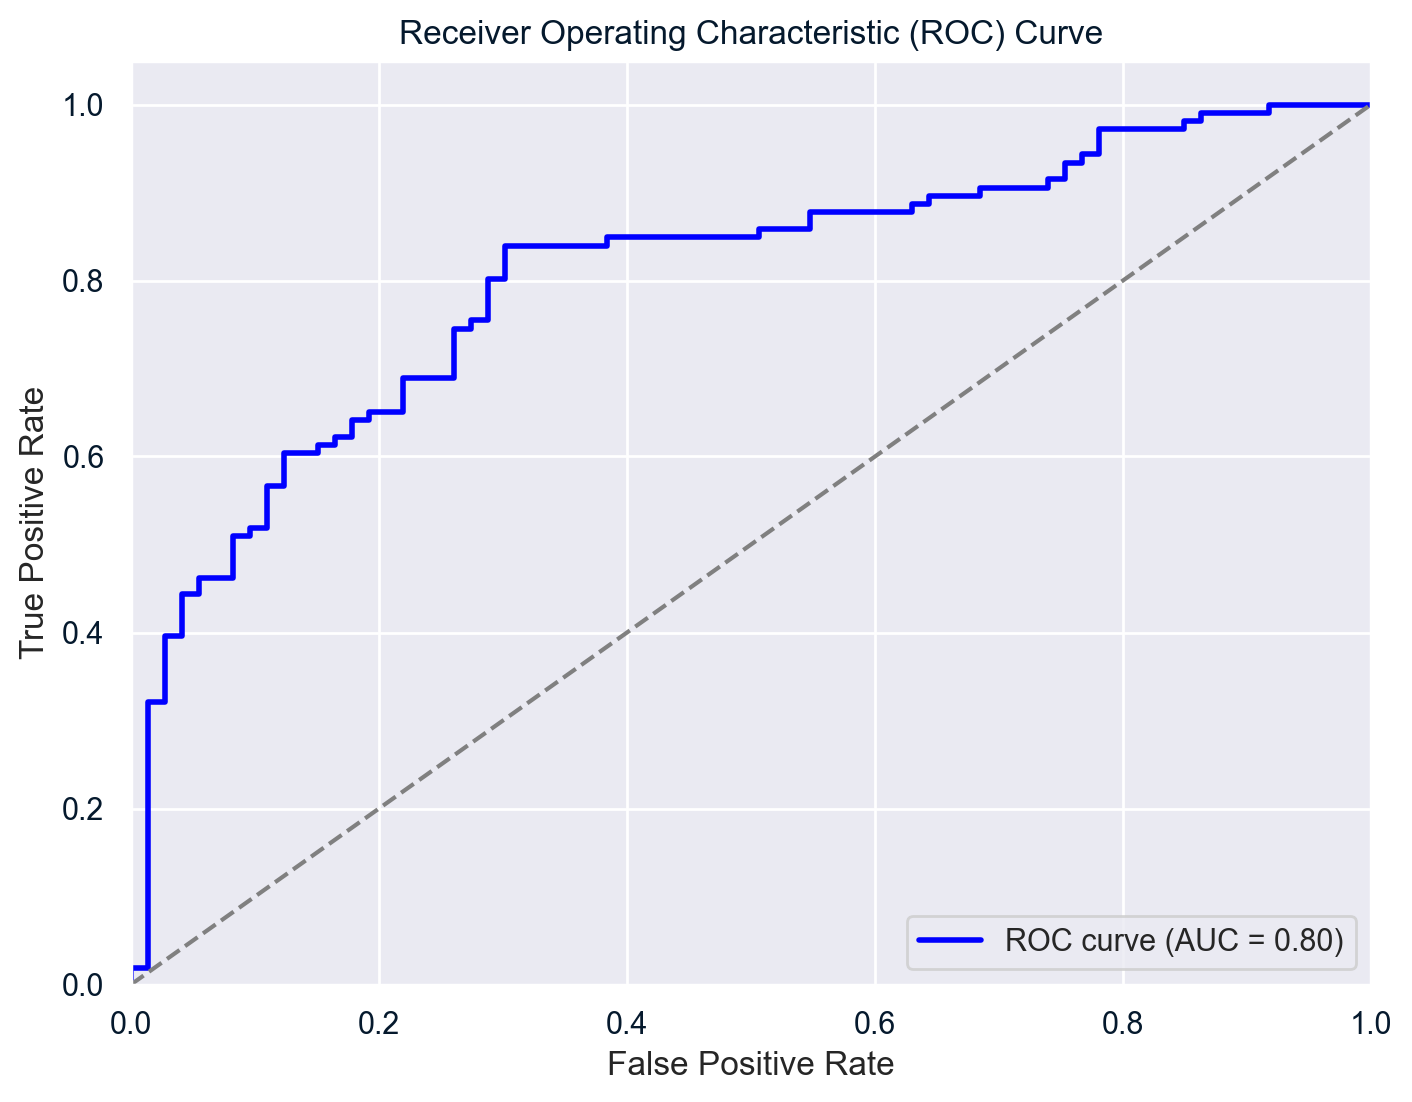

('Logistic Regression',
 0.7653631284916201,
 0.7962962962962963,
 0.8113207547169812)

In [106]:
model_evaluation(log_search.best_estimator_, X_test, y_test, X_train, y_train, "Logistic Regression")

#### 9.4 Model Interpretation

In this section, we provide an interpretation of the models used for predicting high-traffic recipes, focusing on understanding the impact of different features on the model’s predictions. This includes analyzing feature importance, coefficients, and interpreting how the model behaves based on the data provided.

In [107]:
# Get the feature names after pre-processing
feature_names = preprocessor.get_feature_names_out()

# Get the logistic regression coefficients
logreg_coef = log_search.best_estimator_.named_steps['classifier'].coef_[0]

# Create a DataFrame with feature names and coefficients
feature_coef = pd.DataFrame({'Feature': feature_names, 'Odds Ratio': np.exp(logreg_coef)})

# Print the feature coefficients in descending order
print(feature_coef.sort_values(by='Odds Ratio', ascending=False))

                        Feature  Odds Ratio
13      cat__category_Vegetable    2.774333
12         cat__category_Potato    1.741209
11           cat__category_Pork    1.202369
2                  log__protein    1.078124
3             log__carbohydrate    1.004891
0                 log__calories    1.000000
7         cat__category_Dessert    1.000000
8    cat__category_Lunch/Snacks    1.000000
9            cat__category_Meat    1.000000
10  cat__category_One Dish Meal    1.000000
14          remainder__servings    1.000000
1                    log__sugar    0.980117
6         cat__category_Chicken    0.506741
5       cat__category_Breakfast    0.302373
4       cat__category_Beverages    0.117596


#### Summary
The table abovepresents the odds ratios for various features in the logistic regression model predicting high-traffic recipes. Features with an odds ratio greater than 1, such as Vegetable, Potato, and Pork categories, indicate an increased likelihood of a recipe being high-traffic. For instance, the odds of a recipe being high-traffic are approximately 2.77 times higher if it belongs to the "Vegetable" category, and 1.74 times higher for "Potato" recipes. On the other hand, features with odds ratios less than 1, such as Chicken, Breakfast, and Beverages categories, suggest a decreased likelihood of being high-traffic. For example, "Chicken" recipes have 0.51 times the odds of being high-traffic, and "Breakfast" recipes have only 0.30 times the odds. The calories feature has no effect on the outcome, as its odds ratio is exactly 1. Additionally, an increase in protein content slightly increases the odds of a recipe being high-traffic, while higher sugar content marginally decreases the odds. The number of servings does not significantly influence the likelihood of a recipe being high-traffic either. This in fact show that our model corroborates the findings from our Exploratory Data Analysis.

#### Project Goals


At the moment, the team choose their favorite recipe from a selection and display that on the home page. They have noticed that traffic to the rest of the website goes up by as much as 40% if they pick a popular recipe, but they don’t know how to decide if a recipe will be popular. More traffic means more subscriptions so this is really important to the company.

The product manager from Tasty Bytes specifically requested to:

🟢 Predict which recipes will lead to high traffic.

🟢 Correctly predict high traffic recipes 80% of the time.


#### Aligning Model Performance to Business Goals
The Logistic Regression model achieves a recall of 81.13%, which meets the business goal of correctly predicting high-traffic recipes 80% of the time. This indicates that the model successfully identifies the majority of high-traffic recipes, ensuring that popular recipes are not missed. As recall is the key metric for the business objective, Logistic Regression is a reliable choice for predicting high-traffic recipes, making it well-aligned with the business's core goal of maximizing high-traffic recipe predictions.

### 10. Business Metrics
The business metric I would recommend for evaluating performance is the **Recipe Popularity Rate**, which is calculated using the following formula:

Recipe Popularity Rate= (Number of High-Traffic Recipes / Total Number of Recipes) * 100

Based on the data provided by Tasty Bytes, out of 895 recipes, the **Recipe Popularity Rate** is 60%. This metric can be calculated monthly and visualized with the aid of a dashboard.

#### Limitations

This metric, while aligned with the business goal of assessing high-traffic recipes, has its limitations. It offers a qualitative measure, demonstrating that a substantial portion of the recipes (60%) are popular, but it doesn't provide a quantitative understanding of how website traffic is growing or the exact rate at which it is increasing. This lack of information prevents us from understanding the pace of traffic growth. Additionally, the data from Tasty Bytes does not clarify how website traffic is measured or define the threshold at which a recipe is considered "high-traffic." Consequently, without these clarifications, the metric lacks the precision needed to gauge the specific dynamics of website traffic.

#### Suggestions
If further information is given, better metrics such as the Engagement Rate and the Customer Subscription Rate can be used.

**Engagement Rate:**



Engagement Rate helps assess how users are interacting with the recipes on the platform. This could include actions like liking, commenting, saving, sharing, or clicking on a recipe to view more details.

**Customer Subscription Rate:** 





The Customer Subscription Rate helps to measure how well the platform is converting recipe visitors into paying or subscribed users.



### 11. Summary of Analysis


The analysis of recipe traffic prediction involved several key steps and metrics to align with the business goal of predicting high-traffic recipes with an accuracy of 80%. The process began with data preprocessing, which included addressing missing values, data type inconsistencies, and outliers, while ensuring the dataset was free of duplicates and inconsistencies within categorical data. Feature exploration followed, where we analyzed numerical and categorical variables such as calories, protein, sugar, and recipe categories for their impact on traffic prediction.

For model selection, we chose Logistic Regression and Random Forest models based on their ability to handle linear and non-linear relationships in the data. Logistic Regression was favored for its interpretability, allowing us to assess the likelihood of a recipe being high-traffic based on its features. We focused on recall (sensitivity) as the primary evaluation metric since it directly addresses the business objective of identifying high-traffic recipes. The Logistic Regression model achieved a recall of 81.13%, successfully meeting the goal of predicting high-traffic recipes 80% of the time. We then carried out hyperparameter tuning on the logistic regression, this didn't improve the model that much.

The Recipe Popularity Rate was calculated and found that 60% of the recipes were high-traffic. However, this metric presented some limitations, providing a qualitative insight into traffic but lacking the granularity needed to measure the growth rate of website traffic. Model interpretation revealed that factors like recipe category (e.g., "Vegetable," "Potato") and nutritional content (e.g., protein, carbohydrates) significantly influenced recipe popularity, providing actionable insights for content and marketing strategies.


### 12. Recommendations

- Based on the model analysis, features like recipe category were found to influence the likelihood of a recipe being high-traffic. Tasty Bytes should focus on promoting recipes from categories such as "Vegetable," "Potato," and "Pork," which show a higher association with high-traffic recipes.
- Incorporate more detailed data on user interactions, such as time spent on a recipe, clicks, shares, and ratings. These insights will provide a deeper understanding of what makes a recipe successful beyond just the nutritional content.
- The Recipe Popularity Rate provides valuable insight into the proportion of high-traffic recipes in the dataset. Tasty Bytes should track this metric regularly and aim to increase it over time. This will help align business goals with data-driven decisions on recipe promotion and website traffic growth. While this metric is useful, it should be supplemented with additional metrics such as Engagement Rate and Customer Subscription Rate that measure the rate at which traffic is growing to provide more actionable insights for growth strategy.
- Explore A/B testing for recipe recommendations to measure the effectiveness of the predictions in driving traffic to specific recipes.
- Continuously monitor model performance in real-time and adjust predictions as needed. Real-world dynamics, like seasonality and trending topics, can significantly impact recipe popularity, so the model should be retrained regularly with updated data to account for changing user preferences.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation